<center>
<b>Corso di Laurea<br>in Mathematical Engineering</b>

---

<h3>Business Intelligence per Big Data</h3>

# **Glass Type Classification**



<img src="logo_università/logo_Politecnico_Torino.jpg" alt="logo" width="200">

<br>



<span style="font-size:20px"><b>Andrea Terenziani</b> s349167</span>  

---

<b>Anno Accademico 2024–2025</b>

</center>


###  Introduzione

Nel settore industriale della produzione e del riciclo del vetro, identificare con precisione la tipologia di vetro è fondamentale per garantire la qualità dei prodotti finali e l'efficienza del processo produttivo.  
Le aziende di manifattura e i fornitori di materiali possono trarre vantaggio da modelli predittivi in grado di classificare i campioni in base alla loro composizione chimica, migliorando l'automazione e riducendo i costi di analisi in laboratorio.


###  Obiettivo

Sviluppare un sistema di classificazione automatica della tipologia di vetro basato sulla sua composizione chimica.  
La variabile target è `$GlassType$`, che identifica la classe del vetro.

---

In [1]:
%pip install seaborn

In [2]:
# Importing some dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.patches as mpatches
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc




# DATASET

In [3]:
#Loading the dataset
train_dataset = pd.read_csv('glass/glass_train.csv')
test_dataset = pd.read_csv('glass/glass_test.csv')

columns = train_dataset.columns

In [4]:
print(f'dataset info')
train_dataset.info()

dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RI                    1027 non-null   float64
 1   Na                    1027 non-null   float64
 2   Mg                    1027 non-null   float64
 3   Al                    1027 non-null   float64
 4   Si                    1027 non-null   float64
 5   K                     1027 non-null   float64
 6   Ca                    1027 non-null   float64
 7   Ba                    1027 non-null   float64
 8   Fe                    1027 non-null   float64
 9   GlassType             1027 non-null   int64  
 10  Sodium_Aluminum_Mix   820 non-null    float64
 11  Synthetic_Noise_Flag  1027 non-null   int64  
 12  Refractive_Si_Sum     1027 non-null   float64
 13  Magnesium_Enhanced    920 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 112.5 KB


In [6]:
print(f'train_dataset:')
train_dataset

train_dataset:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType,Sodium_Aluminum_Mix,Synthetic_Noise_Flag,Refractive_Si_Sum,Magnesium_Enhanced
0,1.471138,13.036971,3.255788,1.243345,72.940387,0.599498,8.770758,-0.007874,0.189595,2,6.889988,0,74.48660,NaN
1,1.509522,14.143119,-0.059639,2.691509,73.426619,0.102823,9.097059,0.609983,0.036512,7,7.912532,1,74.90545,0.078380
2,1.515544,13.218531,3.311728,1.445629,73.138988,0.399288,8.264324,0.020416,0.015794,2,7.028234,0,74.61590,3.976799
3,1.522537,13.049712,3.525647,1.511963,73.103763,0.736383,7.894720,-0.064437,-0.019610,2,NaN,0,74.62596,4.361036
4,1.509205,12.781430,3.542773,1.883003,72.837079,0.671457,7.938078,-0.014075,0.034310,2,6.781243,1,74.37590,4.256553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1.506459,14.822355,0.013522,2.415529,73.710763,0.024143,8.347064,0.536920,-0.032218,7,8.259305,0,75.23514,0.043392
1023,1.570073,12.805531,3.555148,1.435456,72.727597,0.505969,8.490699,-0.013391,0.218806,1,7.003565,1,74.26750,4.301168
1024,1.494411,13.224242,3.933231,1.381494,72.331625,0.575825,8.337929,-0.073124,0.093398,2,7.039529,1,73.84829,4.658460
1025,1.543245,13.686412,3.664750,0.656338,72.968202,0.007652,8.949644,0.016427,-0.014014,3,6.946998,0,74.51779,4.366298


In [7]:
print(f'test_dataset:\n')
test_dataset

test_dataset:



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType,Sodium_Aluminum_Mix,Synthetic_Noise_Flag,Refractive_Si_Sum,Magnesium_Enhanced
0,1.517760,13.530000,3.410000,1.520000,72.040000,0.580000,8.790000,0.000000,0.000000,3,7.101870,0,73.55776,4.104510
1,1.538469,11.559642,1.886709,1.634707,72.877870,0.505694,11.370515,-0.030739,-0.009959,5,6.289278,1,74.38171,2.139020
2,1.534076,13.549569,3.382250,1.463499,72.038502,0.523395,8.791579,0.024536,-0.005483,3,7.101870,0,73.55776,4.104510
3,1.514090,14.250000,3.090000,2.080000,72.280000,1.100000,7.080000,0.000000,0.000000,2,7.668151,0,73.79409,3.720996
4,1.478177,12.871520,3.532996,1.910522,72.845357,0.685375,7.988965,0.037519,-0.027460,2,6.781243,1,74.37590,4.256553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1.542903,13.332674,3.558589,1.528461,72.868272,0.606501,7.926197,0.051873,-0.021612,2,7.297464,1,74.38631,4.244983
253,1.525941,12.641698,2.931275,1.739252,73.222055,0.703164,8.548560,0.025063,-0.045519,2,6.848511,0,74.72689,3.379846
254,1.517690,13.650000,3.660000,1.110000,72.770000,0.110000,8.600000,0.000000,0.000000,3,7.034305,0,74.28769,NaN
255,1.516620,12.850000,3.510000,1.440000,73.010000,0.680000,8.230000,0.060000,0.250000,2,6.696252,0,74.52662,4.245405


### Analisi features e classi target

In [9]:
#train
x_train = train_dataset.drop(columns='GlassType')
x_train = pd.DataFrame(x_train, columns=train_dataset.drop(columns='GlassType').columns)

y_train=train_dataset['GlassType'] 

features= x_train.columns
targets=["1: finestre_edilizie_flat_elaborate","2: finestre_edilizie_non_float_elaborate","3: finestre_veicoli_float_elaborate","4: finestre_veicoli_non_float_elaborate","5: contenitori","6: stoviglie","7: fari" ]
classi=list(range(1,8))


print(f'features: ',features)
print(f'shape features: ', np.shape(features))
print(f'targets: ', targets)


#test
x_test = test_dataset.drop(columns='GlassType')
x_test = pd.DataFrame(x_test, columns=train_dataset.drop(columns='GlassType').columns)

y_test=test_dataset['GlassType'] 

features:  Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Sodium_Aluminum_Mix', 'Synthetic_Noise_Flag', 'Refractive_Si_Sum',
       'Magnesium_Enhanced'],
      dtype='object')
shape features:  (13,)
targets:  ['1: finestre_edilizie_flat_elaborate', '2: finestre_edilizie_non_float_elaborate', '3: finestre_veicoli_float_elaborate', '4: finestre_veicoli_non_float_elaborate', '5: contenitori', '6: stoviglie', '7: fari']


In [10]:
print(f'Possiamo notare come ogni features, abbia valori numerici. Non è dunque necessario svolgere nè one hot encoding nè label encoding\n')
print(f'''Per quanto riguarda la variabile target, il label encoding è stato già effettuato nel dataset fornito.\nAi valori numerici forniti corrispondono le seguenti classi:
GlassType: Classe del vetro (target di classificazione).
1: finestre_edilizie_flat_elaborate
2: finestre_edilizie_non_float_elaborate
3: finestre_veicoli_float_elaborate
4: finestre_veicoli_non_float_elaborate
5: contenitori
6: stoviglie
7: fari ''')

Possiamo notare come ogni features, abbia valori numerici. Non è dunque necessario svolgere nè one hot encoding nè label encoding

Per quanto riguarda la variabile target, il label encoding è stato già effettuato nel dataset fornito.
Ai valori numerici forniti corrispondono le seguenti classi:
GlassType: Classe del vetro (target di classificazione).
1: finestre_edilizie_flat_elaborate
2: finestre_edilizie_non_float_elaborate
3: finestre_veicoli_float_elaborate
4: finestre_veicoli_non_float_elaborate
5: contenitori
6: stoviglie
7: fari 


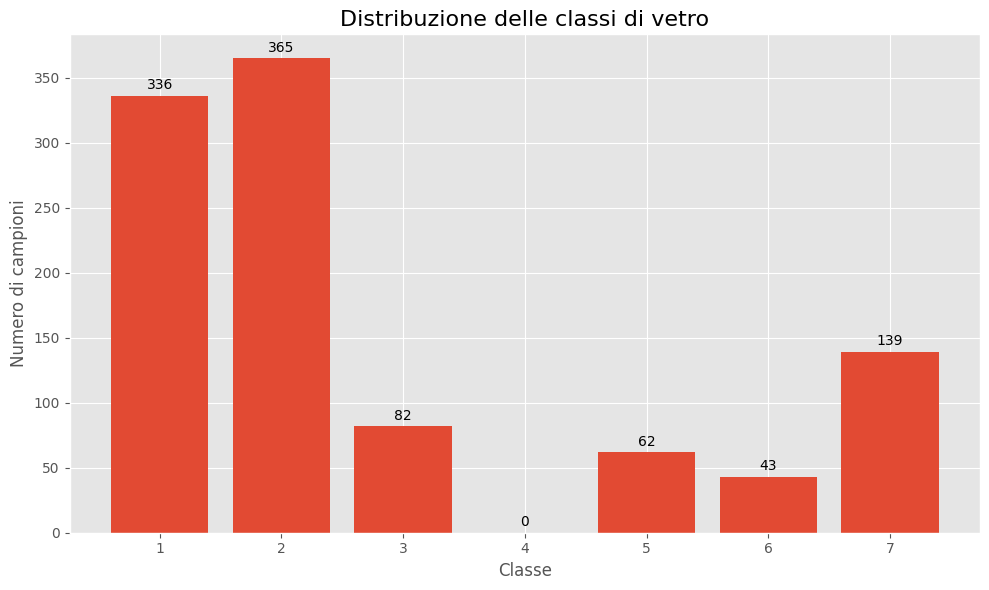

Il numero di volte che compare la classe 4 nel test dataset è: 0


In [11]:
#TARGETS
count_targets=np.zeros(len(targets))
i=0
for elem in targets:
    count_targets[i]= (y_train == i+1) .sum()
    i=i+1




# Imposto lo stile grafici
plt.style.use('ggplot')  # Altri stili: 'seaborn', 'fivethirtyeight', 'bmh', 'dark_background'
# Crea il grafico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(targets, count_targets)
# Aggiungo etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=10)
# Titoli e assi
ax.set_title('Distribuzione delle classi di vetro', fontsize=16)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylabel('Numero di campioni', fontsize=12)
ax.set_xticks(range(len(bars)))              # posizioni
ax.set_xticklabels(range(1, len(bars) + 1))  # etichette numerate da 1
plt.tight_layout()
plt.savefig("grafici/distribuzione_delle_classi.png", dpi=300)
plt.show()



count_classe_4_test=0
for elem in y_test:
    if elem==4:
        count_classe_4_test=count_classe_4_test+1
print(f'Il numero di volte che compare la classe 4 nel test dataset è:',count_classe_4_test)



In [12]:
print('Possiamo notare che il dataset non è perfettamente bilanciato e che la classe 4: finestre_veicoli_non_float_elaborate non compare nè nel dataset di train nè nel dataset di test')

Possiamo notare che il dataset non è perfettamente bilanciato e che la classe 4: finestre_veicoli_non_float_elaborate non compare nè nel dataset di train nè nel dataset di test


C:\Users\ANDY\AppData\Local\Temp\ipykernel_20952\2333764798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\ANDY\AppData\Local\Temp\ipykernel_20952\2333764798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\ANDY\AppData\Local\Temp\ipykernel_20952\2333764798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\ANDY\AppData\Local\Temp\ipykernel_20952\2333764798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

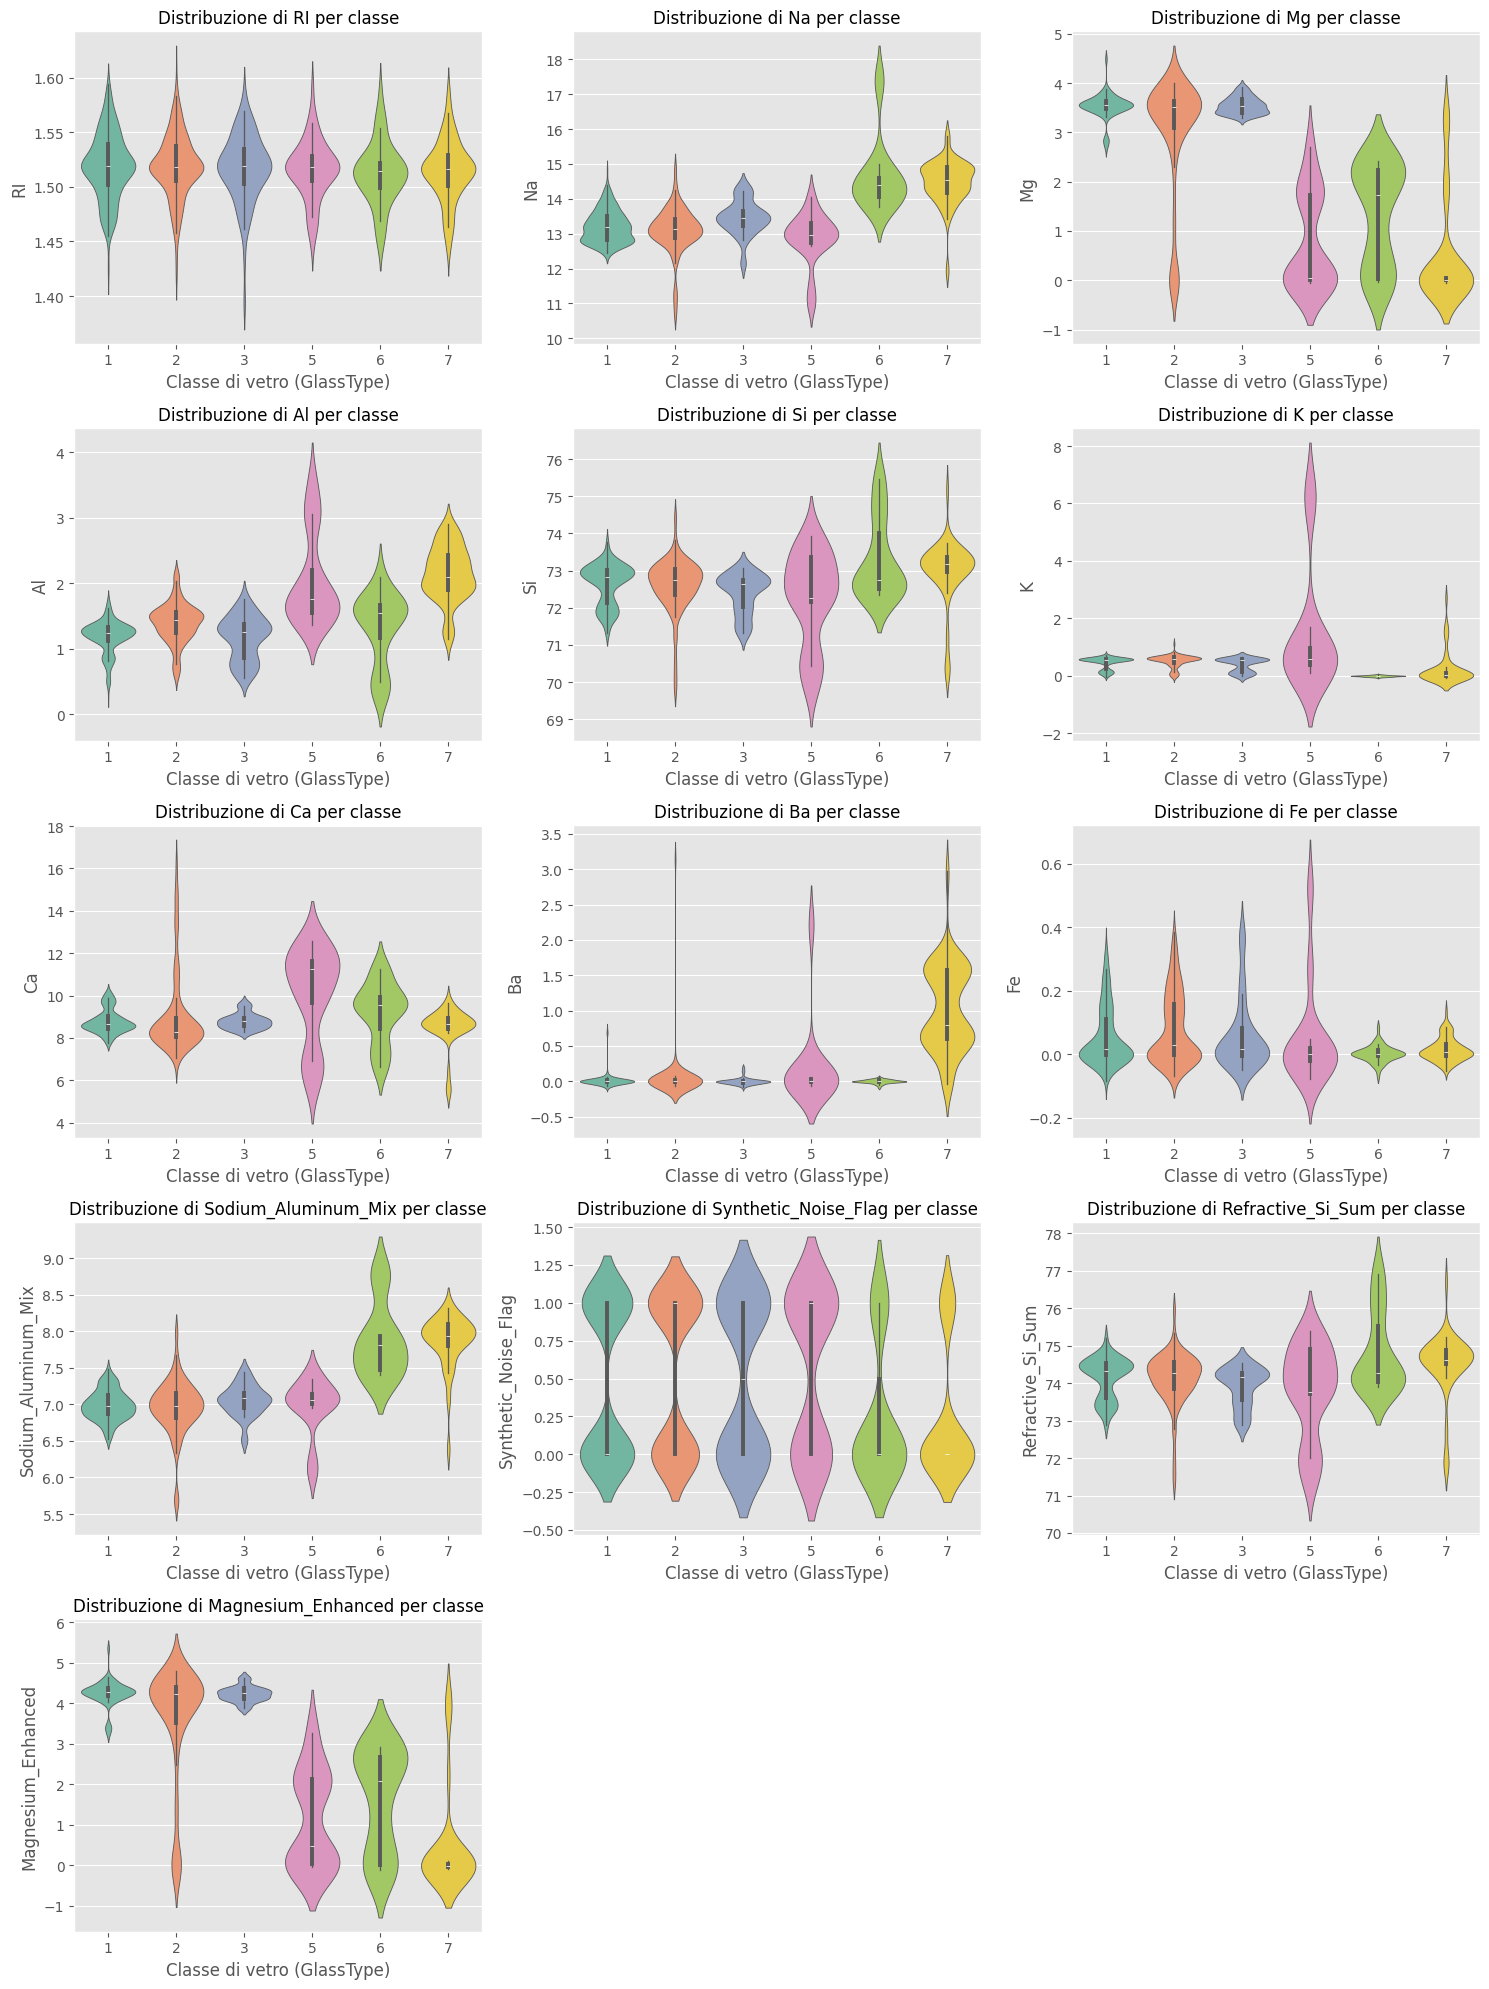

In [16]:
#FEATURES VIOLIN PLOT

n_features = len(features)

# numero di colonne e righe nel plot
cols = 3
rows = (n_features + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for i, elem in enumerate(features):
    sns.violinplot(
        data=train_dataset,
        x='GlassType',
        y=elem,
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuzione di {elem} per classe', fontsize=12)
    axes[i].set_xlabel('Classe di vetro (GlassType)')
    axes[i].set_ylabel(elem)

# rimuovo spazi vuoti
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
#FEATURES BOX PLOT
'''
for elem in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=train_dataset, x='GlassType', y=elem, palette='Set2')

    plt.title(f'Distribuzione di {elem} per classe di vetro', fontsize=14)
    plt.xlabel('Classe di vetro (GlassType)')
    plt.ylabel(f'{elem}')
    plt.tight_layout()
    plt.show()

'''

"\nfor elem in features:\n    plt.figure(figsize=(4, 4))\n    sns.boxplot(data=train_dataset, x='GlassType', y=elem, palette='Set2')\n\n    plt.title(f'Distribuzione di {elem} per classe di vetro', fontsize=14)\n    plt.xlabel('Classe di vetro (GlassType)')\n    plt.ylabel(f'{elem}')\n    plt.tight_layout()\n    plt.show()\n\n"

In [13]:
#FEATURES SCATTER PLOT
'''
for elem in features:
    plt.figure(figsize=(4, 4))
    sns.stripplot(data=train_dataset, x='GlassType', y=elem, palette='Set2', jitter=True, alpha=0.6)

    plt.title(f'Scatter plot: {elem} per classe di vetro', fontsize=14)
    plt.xlabel('Classe di vetro (GlassType)')
    plt.ylabel(elem)
    plt.tight_layout()
    plt.show()

'''

"\nfor elem in features:\n    plt.figure(figsize=(4, 4))\n    sns.stripplot(data=train_dataset, x='GlassType', y=elem, palette='Set2', jitter=True, alpha=0.6)\n\n    plt.title(f'Scatter plot: {elem} per classe di vetro', fontsize=14)\n    plt.xlabel('Classe di vetro (GlassType)')\n    plt.ylabel(elem)\n    plt.tight_layout()\n    plt.show()\n\n"

### Vincoli di dominio


**RI**   > 0 

**Na**  ≥ 0 

**Mg**  ≥ 0 

**Al**  ≥ 0 

**Si**  ≥ 0 

**K**   ≥ 0 

**Ca**  ≥ 0 

**Ba**  ≥ 0 

**Fe**  ≥ 0   

**Synthetic\_Noise\_Flag**  ∈ {0, 1}                                             




In [14]:
non_negative_features = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

count_outliers_per_feature_train=np.zeros(len(non_negative_features)+1)
count_outliers_per_feature_test=np.zeros(len(non_negative_features)+1)

i=0
for elem in non_negative_features:
    count_outliers_per_feature_train[i]=(x_train[elem]<0).sum()
    count_outliers_per_feature_test[i]=(x_test[elem]<0).sum()
    i=i+1
count_outliers_per_feature_train[len(non_negative_features)]= (~x_train['Synthetic_Noise_Flag'].isin([0, 1])).sum()
count_outliers_per_feature_test[len(non_negative_features)]= (~x_test['Synthetic_Noise_Flag'].isin([0, 1])).sum()



mask_train= (x_train[non_negative_features]<0 ).any(axis=1) | (~x_train['Synthetic_Noise_Flag'].isin([0, 1]))  #dataframe booleano (indice: True) se almeno un valore rispetta condizione (indice : false) altrimenti
#NB non esiste il metodo notin(), quindi si usa ~ per negare
mask_test= (x_test[non_negative_features]<0).any(axis=1) | (~x_test['Synthetic_Noise_Flag'].isin([0, 1]))


outlier_indexes_train= x_train[mask_train].index
outlier_indexes_test= x_test[mask_test].index

print(f'numero complessivo outliers train: {len(outlier_indexes_train)}')
print(f'numero complessivo outliers test: {len(outlier_indexes_test)}\n')

i=0
for elem in count_outliers_per_feature_test:
    if i != len(non_negative_features):
        print(f'Il numero di campioni che non rispetta la feature {non_negative_features[i]} nel train è di: {count_outliers_per_feature_train[i]:.0f}')
        print(f'Il numero di campioni che non rispetta la feature {non_negative_features[i]} nel test è di: {count_outliers_per_feature_test[i]:.0f}\n')  
    else:
        print(f'Il numero di campioni che non rispetta la feature Synthetic_Noise_Flag nel train è di: {count_outliers_per_feature_train[i]:.0f}')
        print(f'Il numero di campioni che non rispetta la feature Synthetic_Noise_Flag nel test è di: {count_outliers_per_feature_test[i]:.0f}') 

    i=i+1

numero complessivo outliers train: 591
numero complessivo outliers test: 150

Il numero di campioni che non rispetta la feature Na nel train è di: 0
Il numero di campioni che non rispetta la feature Na nel test è di: 0

Il numero di campioni che non rispetta la feature Mg nel train è di: 69
Il numero di campioni che non rispetta la feature Mg nel test è di: 20

Il numero di campioni che non rispetta la feature Al nel train è di: 0
Il numero di campioni che non rispetta la feature Al nel test è di: 0

Il numero di campioni che non rispetta la feature Si nel train è di: 0
Il numero di campioni che non rispetta la feature Si nel test è di: 0

Il numero di campioni che non rispetta la feature K nel train è di: 77
Il numero di campioni che non rispetta la feature K nel test è di: 15

Il numero di campioni che non rispetta la feature Ca nel train è di: 0
Il numero di campioni che non rispetta la feature Ca nel test è di: 0

Il numero di campioni che non rispetta la feature Ba nel train è di:

In [15]:
print(f'''Poichè il numero di outliers rappresenta una percentuale estremamente alta del dataset originale, sia per quanto riguarda il train che per il test,
      si suppone che i dati siano stati misurati con unità di misura (non precisata) che ammetta anche valori negativi per le features Mg, K, Ba, Fe.
      Se così non fosse e avessimo la certezza che i vincoli di dominio ipotizzati siano effettivamente corretti, sarebbe necessario eliminare dai dataset tutti
      gli outliers attraverso al metodo drop''')

Poichè il numero di outliers rappresenta una percentuale estremamente alta del dataset originale, sia per quanto riguarda il train che per il test,
      si suppone che i dati siano stati misurati con unità di misura (non precisata) che ammetta anche valori negativi per le features Mg, K, Ba, Fe.
      Se così non fosse e avessimo la certezza che i vincoli di dominio ipotizzati siano effettivamente corretti, sarebbe necessario eliminare dai dataset tutti
      gli outliers attraverso al metodo drop


### Dati mancanti

In [16]:
#missing values in the train dataset?
train_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_train = train_dataset.isnull().sum()
print("Null values in train dataset: \n", null_values_train,'\n -------')

#missing values in the train dataset?
test_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_test = test_dataset.isnull().sum()
print("Null values in train dataset: \n", null_values_test)

Null values in train dataset: 
 RI                        0
Na                        0
Mg                        0
Al                        0
Si                        0
K                         0
Ca                        0
Ba                        0
Fe                        0
GlassType                 0
Sodium_Aluminum_Mix     207
Synthetic_Noise_Flag      0
Refractive_Si_Sum         0
Magnesium_Enhanced      107
dtype: int64 
 -------
Null values in train dataset: 
 RI                       0
Na                       0
Mg                       0
Al                       0
Si                       0
K                        0
Ca                       0
Ba                       0
Fe                       0
GlassType                0
Sodium_Aluminum_Mix     45
Synthetic_Noise_Flag     0
Refractive_Si_Sum        0
Magnesium_Enhanced      19
dtype: int64


In [17]:
print(f'Possiamo notare come le uniche features che presentano campioni senza un valore associato ad esse sono le features Sodium_Aluminum_Mix e Magnesium_Enhanced')

Possiamo notare come le uniche features che presentano campioni senza un valore associato ad esse sono le features Sodium_Aluminum_Mix e Magnesium_Enhanced


### KNN IMPUTER e STANDARDIZZAZIONE DATI

Per assegnare un valore ai dati mancanti, utilizzo il metodo **KNN Imputer**, il cui funzionamento è il seguente:  
per ogni campione contenente valori nulli, vengono selezionati i *k* campioni (cioè le *k* righe) senza valori mancanti e con la distanza più bassa rispetto al campione considerato.  
La metrica di distanza utilizzata è la **distanza euclidea**.

Il valore mancante viene sostituito con la funzione aggregata desiderata calcolata sui valori della feature corrispondente nei *k* campioni più simili. In questo caso come funzione aggregata si è optato per una **media pesata**, dove il peso dei campioni più vicino contribuisce con maggior peso.

Poiché il metodo si basa sul calcolo delle distanze tra le osservazioni, è fondamentale **standardizzare** i dati prima di applicarlo.  
La standardizzazione permette infatti di dare a ciascuna feature lo stesso peso, eliminando distorsioni dovute a scale diverse o unità di misura eterogenee.

La formula utilizzata per la standardizzazione è quella dello `StandardScaler`:

$$
z = \frac{x - \mu}{\sigma}
$$

dove:  
- $x$ è il valore originale  
- $\mu$ è la media della feature  
- $\sigma$ è la deviazione standard della feature

**NB**

Si noti che applicando  la **standardizzazione** (`StandardScaler`) e l’**imputazione dei valori mancanti** (`KNNImputer`), applichiamo il metodo `.fit()` **solo sul training set** e trasformiamo con il metodo **transform() sia il training che il test** .

Questo serve per evitare il **data leakage** ovvero l’uso di informazioni provenienti dal test set durante l' addestramento.




In [18]:
#Standardizzazione dataset
scaler = StandardScaler()
scaler.fit(x_train)
x_train_stand= scaler.transform(x_train)
x_test_stand= scaler.transform(x_test)

#imputazione valori mancanti
k=7 
imputer = KNNImputer(n_neighbors=k,weights='distance')
X_train = imputer.fit_transform(x_train_stand)
X_test = imputer.transform(x_test_stand)

#li rendo nuovamente dataframe pandas
X_train = pd.DataFrame(
    X_train,
    columns=x_train.columns,
)
X_test = pd.DataFrame(
    X_test,
    columns=x_train.columns,
)


#verifica che tutti i dati siano stati correttamente imputati:
#missing values in the train dataset?
X_train.replace(to_replace="", value = np.nan, inplace=True)
null_values_train = X_train.isnull().sum().sum()
#missing values in the test dataset?
X_test.replace(to_replace="", value = np.nan, inplace=True)
null_values_test = X_test.isnull().sum().sum()
if null_values_test+null_values_train==0:
    print(' Nessun campione ha valori mancanti')
else:
    print(f' Mancano ancora dei valori - Train:\n{null_values_train}\nTest:\n{null_values_test}')


 Nessun campione ha valori mancanti


### SCATTER MATRIX e ANALISI features con alta covarianza

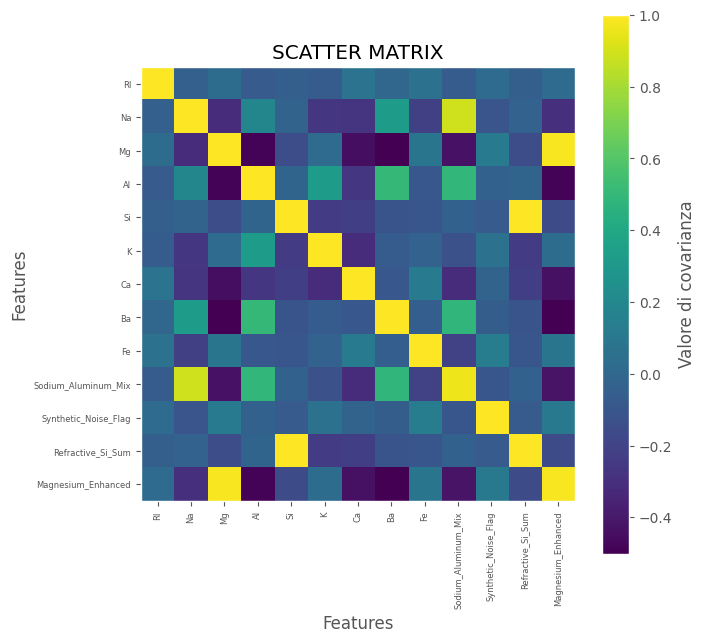

In [19]:
Scatter_Matrix= np.cov(X_train, rowvar=False)

plt.figure(figsize=(7, 7))
plt.imshow(Scatter_Matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Valore di covarianza')
plt.title('SCATTER MATRIX')
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation=45, fontsize=6)  
plt.yticks(ticks=np.arange(len(features)), labels=features, fontsize=6)  
plt.xlabel('Features')
plt.ylabel('Features')
plt.grid(False)
plt.xticks(rotation=90)  
plt.savefig("grafici/scatter_matrix.png", dpi=300)
plt.show()

In [20]:
print(f'''Si può notare come alcune variabili risultino fortemente correlate. Studiamole nel dettaglio le features con valore assoluto di covarianza superiore ad una determinata soglia.
      Si noti inoltre come la matrice di covarianza sia simmetrica, sarà dunque necessario analizzare solo metà di essa.
      ''')

Si può notare come alcune variabili risultino fortemente correlate. Studiamole nel dettaglio le features con valore assoluto di covarianza superiore ad una determinata soglia.
      Si noti inoltre come la matrice di covarianza sia simmetrica, sarà dunque necessario analizzare solo metà di essa.
      


In [21]:
insieme_high_corr=[]
soglia=0.85

for i in range(0,np.shape(Scatter_Matrix)[0]):
    for j in range(i+1,np.shape(Scatter_Matrix)[0]):
        if abs(Scatter_Matrix[i][j])>=soglia:
            insieme_high_corr.append([i,j])

print(insieme_high_corr)

print

[[1, 9], [2, 12], [4, 11]]


<function print>

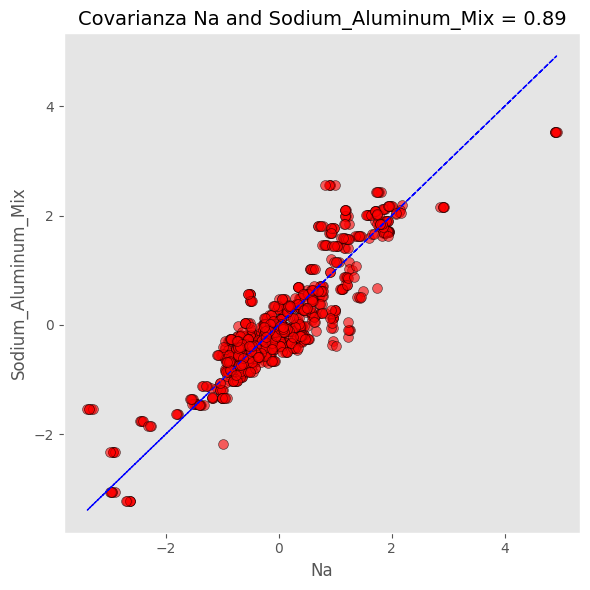

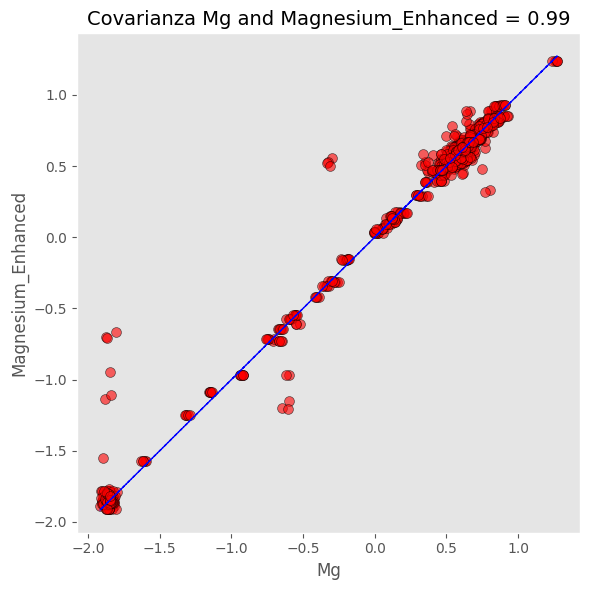

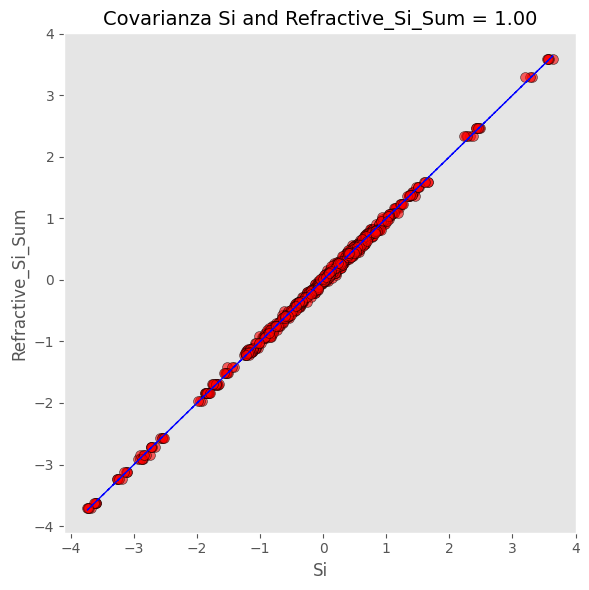

In [22]:
for elem in insieme_high_corr:
    ascissa= X_train.iloc[:,elem[0]]
    label_ascissa=features[elem[0]]
    ordinata= X_train.iloc[:,elem[1]]
    label_ordinata=features[elem[1]]

        # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(ascissa, ordinata, c='red',# colore punti
            alpha=0.6,          # trasparenza
            s=50,               # dimensione dei marker
            edgecolor='k')      # bordo nero)
    plt.plot(ascissa, ascissa, color='blue', linewidth=1, linestyle='--')


    # Titolo
    plt.title(f'Covarianza {label_ascissa} and {label_ordinata} = {Scatter_Matrix[elem[0], elem[1]]:.2f}', fontsize=14)

    plt.xlabel(f'{label_ascissa}')
    plt.ylabel(f'{label_ordinata}')
    plt.grid(False)
    plt.tight_layout()
    nome_file = f"grafici/covarianza_{label_ascissa}_{label_ordinata}.png"
    plt.savefig(nome_file, dpi=300)
    plt.show()
        
    
    
   


### Rimozione di features altamente correlate

Da queste analisi, risulta evidente una **correlazione estremamente alta** tra alcune coppie di feature. In presenza di questi casi, è conveniente **mantenere una sola feature per ciascuna coppia altamente correlata**, scartando l'altra.

Questa operazione è utile per prevenire il fenomeno di **curse of dimensionality**, in quanto all’aumentare del numero di dimensioni, i punti nello spazio tendono a diventare sempre più distanti e isolati tra loro, con un impatto negativo sugli algoritmi che si basano su metriche di distanza.

Poiché il problema affrontato è di tipo **multiclasse** e si utilizzeranno **modelli che si basano sulla distanza** (come ad esempio il KNN), è molto vantaggioso ridurre la dimensionalità del dataset, anche se il numero iniziale di feature non è eccessivamente elevato. Questa scelta aiuta inoltre a migliorare l’efficienza del modello e a ridurre il rischio di overfitting.


In [23]:
features_to_drop = [features[elem[1]] for elem in insieme_high_corr]
x_train_final = X_train.drop(columns=features_to_drop)
x_test_final = X_test.drop(columns=features_to_drop)



### CONFRONTO CAMPIONE PRIMA e DOPO PREPROCESSING

In [24]:
indici_nan = x_train[x_train.isna().any(axis=1)].index
riga1=x_train.iloc[indici_nan[1]].to_frame().T
riga2=x_train_final.iloc[indici_nan[1]].to_frame().T


In [25]:
print(f'campione PRIMA del preprocessing')
riga1

campione PRIMA del preprocessing


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Sodium_Aluminum_Mix,Synthetic_Noise_Flag,Refractive_Si_Sum,Magnesium_Enhanced
3,1.522537,13.049712,3.525647,1.511963,73.103763,0.736383,7.89472,-0.064437,-0.01961,NaN,0.0,74.62596,4.361036


In [26]:
print(f'campione DOPO preprocessing')
riga2

campione DOPO preprocessing


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Synthetic_Noise_Flag
3,0.154944,-0.443277,0.591851,0.128382,0.578475,0.375784,-0.753135,-0.489333,-0.751687,-0.927635


In [27]:
print('Adesso abbiamo finito il preprocessing e il dataset è pronto per essere analizzato')

Adesso abbiamo finito il preprocessing e il dataset è pronto per essere analizzato


# PCA
In questa sezione si evidenzia l’importanza delle fasi di **preprocessing**, in particolare della **standardizzazione dei dati**, mostrando come questa influisca direttamente sui risultati ottenuti attraverso la **PCA (Principal Component Analysis)**.

La PCA è una tecnica per la **riduzione della dimensionalità** di un dataset, preservando il più possibile la **varianza** originale. Questo metodo individua nuove direzioni del dataset, dette **componenti principali (Principal Components, PC)**, che sono combinazioni lineari delle variabili originarie, sono **ortogonali** tra loro e **ordinate** per varianza spiegata.

Questo metodo opera attraverso all'applicazione di una matrice tale che:
- Gli **autovettori** della matrice di covarianza standardizzata corrispondono alle **direzioni principali** lungo le quali la varianza dei dati è massimizzata.
- Gli **autovalori** associati a ciascun autovettore rappresentano **la quantità di varianza spiegata** lungo quella direzione.

Si noti che, poichè il metodo PCA **non** è robusto per valori Nan, per riprodurre i dati originali, utilizziamo i dati non standardizzati ma **post** KNN Imputer, attraverso inverse_transforme dello standard scaler


c:\Users\ANDY\OneDrive\Desktop\POLI\Analisi_tempo_frequenza\ambiente_virtuale\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


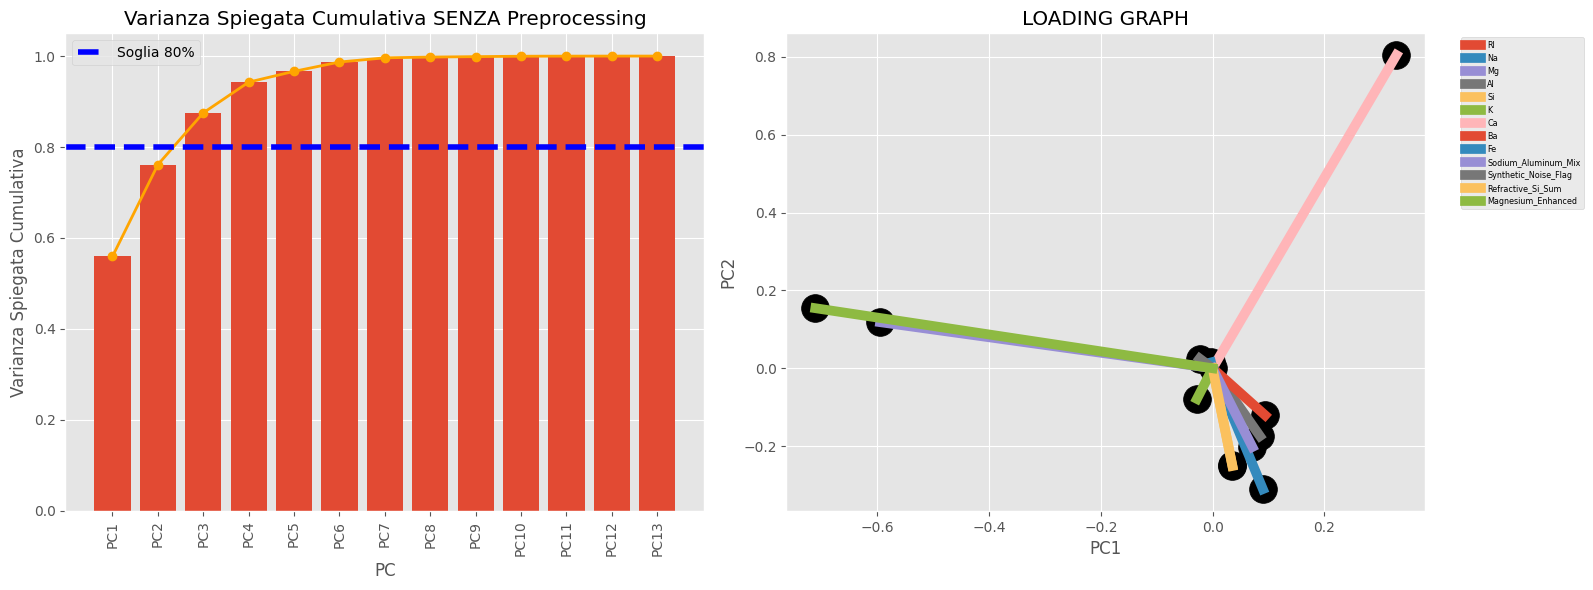

c:\Users\ANDY\OneDrive\Desktop\POLI\Analisi_tempo_frequenza\ambiente_virtuale\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


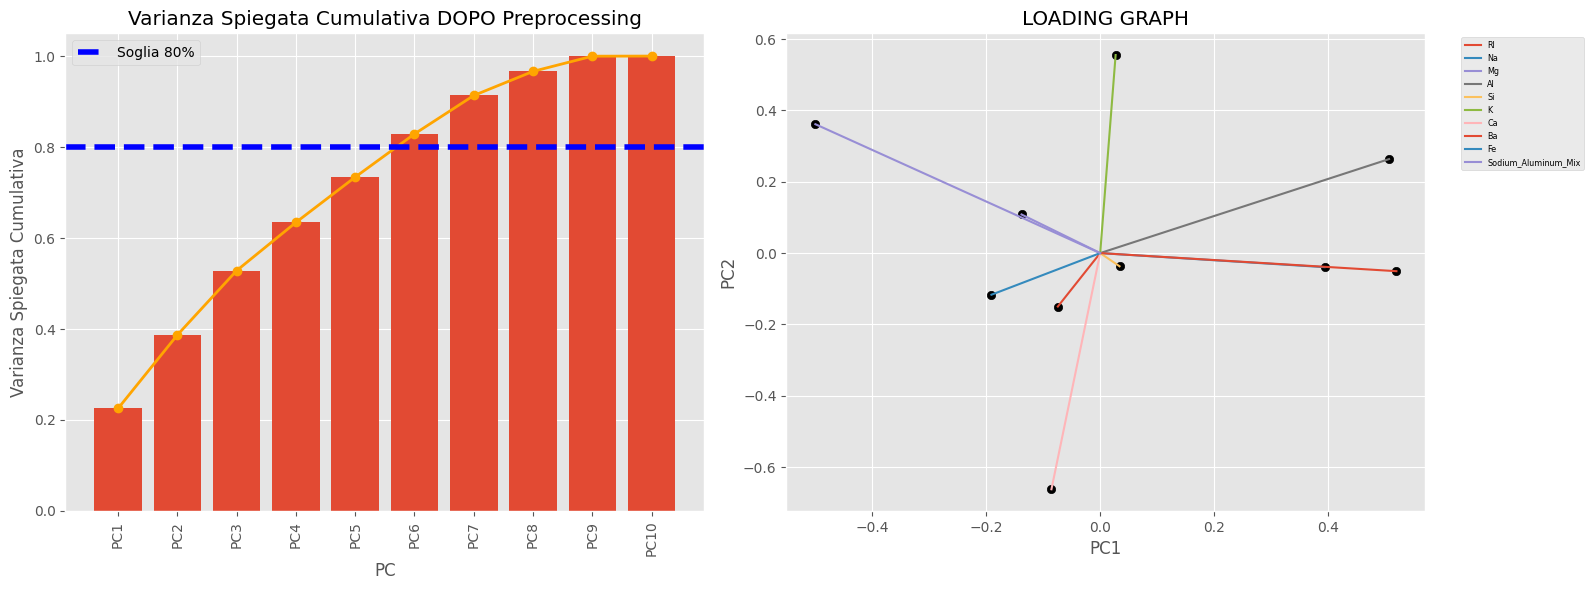

In [28]:
soglia=0.8

train_nonstand= scaler.inverse_transform(X_train)
pca=PCA()
pca.fit(train_nonstand)
var_spieg=pca.explained_variance_ratio_
var_spieg_cum= np.cumsum(var_spieg)
num_PC = np.argmax(var_spieg_cum>= soglia) + 1



#PRIMA preprocessing


fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 riga, 2 colonne

# --- Grafico varianza spiegata cumulativa ---
components = [f'PC{i+1}' for i in range(len(var_spieg_cum))]
axs[0].bar(components, var_spieg_cum)
axs[0].plot(components, var_spieg_cum, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)
axs[0].axhline(y=soglia, color='blue', linestyle='--', linewidth=4, label=f'Soglia {soglia:.0%}')
axs[0].legend()
axs[0].set_xlabel('PC')
axs[0].set_ylabel('Varianza Spiegata Cumulativa')
axs[0].set_title('Varianza Spiegata Cumulativa SENZA Preprocessing')
axs[0].tick_params(axis='x', rotation=90)

# --- Loading graph ---
datas = pd.DataFrame(X_train, columns=features)  
for i in range(pca.n_features_):
    axs[1].plot([0, pca.components_[0, i]], [0, pca.components_[1, i]], label=datas.columns[i],linewidth=7)
axs[1].scatter(pca.components_[0, :], pca.components_[1, :], c='k',s=400)
axs[1].legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
axs[1].set_title('LOADING GRAPH')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].grid(True)

plt.tight_layout()
plt.show()






# DOPO preprocessing

pca=PCA()
pca.fit(x_train_final)
var_spieg=pca.explained_variance_ratio_
var_spieg_cum= np.cumsum(var_spieg)
num_PC = np.argmax(var_spieg_cum>= soglia) + 1


fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 riga, 2 colonne

# --- Grafico varianza spiegata cumulativa ---
components = [f'PC{i+1}' for i in range(len(var_spieg_cum))]
axs[0].bar(components, var_spieg_cum)
axs[0].plot(components, var_spieg_cum, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)
axs[0].axhline(y=soglia, color='blue', linestyle='--', linewidth=4, label=f'Soglia {soglia:.0%}')
axs[0].legend()
axs[0].set_xlabel('PC')
axs[0].set_ylabel('Varianza Spiegata Cumulativa')
axs[0].set_title('Varianza Spiegata Cumulativa DOPO Preprocessing')
axs[0].tick_params(axis='x', rotation=90)

# --- Loading graph ---
datas = pd.DataFrame(x_train_final, columns=features)  
for i in range(pca.n_features_):
    axs[1].plot([0, pca.components_[0, i]], [0, pca.components_[1, i]], label=datas.columns[i])
axs[1].scatter(pca.components_[0, :], pca.components_[1, :], c='k')
axs[1].legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
axs[1].set_title('LOADING GRAPH')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].grid(True)

plt.tight_layout()
plt.show()




In [29]:
print(f''' Come previsto, senza effettuare la standardizzazione del dataset, i contributi di ciascuna feature sono fortemente influenzati dalla scala utilizzata. 
      In questo caso è infatti evidente come le 3 features Mg, Ca, Magnesum_Enhanced contribuiscano per circa il 90% della varianza spiegata complessiva.
      Si può inoltre notare come l'alta correlazione trovata tra Mg e Magnesum_Enhanced si sia tradotta anche nel grafico, infatti, anche se in modulo diverso, apportano percentualmente
       lo stesso contributo alle Principal Components''')

 Come previsto, senza effettuare la standardizzazione del dataset, i contributi di ciascuna feature sono fortemente influenzati dalla scala utilizzata. 
      In questo caso è infatti evidente come le 3 features Mg, Ca, Magnesum_Enhanced contribuiscano per circa il 90% della varianza spiegata complessiva.
      Si può inoltre notare come l'alta correlazione trovata tra Mg e Magnesum_Enhanced si sia tradotta anche nel grafico, infatti, anche se in modulo diverso, apportano percentualmente
       lo stesso contributo alle Principal Components


# DECISION TREE

Il **Decision Tree** è un modello di classificazione multiclasse che costruisce una struttura ad albero per suddividere iterativamente lo spazio delle feature che progressivamente approssimano sempre meglio la classe target

L'algoritmo utilizzato è **CART (Classification And Regression Tree)**, che usa la **divisione dinamica** del dataset. A differenza dell'**Hunt’s algorithm**, che segue regole di suddivisione predefinite (statiche), il metodo CART seleziona in modo adattivo, per ciascun nodo, la feature e la soglia di split che ottimizzano un criterio di impurità (Gini o Entropia).

Per selezionare la configurazione ottimale dell'albero, è stata utilizzata la **cross-validation** con una ricerca su griglia (*GridSearch*), testando varie combinazioni di iperparametri.

Come metrica di valutazione è stato utilizzato l'**F1-macro**, ovvero la media degli **F1-score** di ciascuna classe definiti come:

$
F1 = 2 \cdot \frac{P \cdot R}{P + R}
$

dove:

- **p = precisione**:
$
P = \frac{\text{TP}}{\text{TP} + \text{FP}}
$

- **R = recall**:
$
R = \frac{\text{TP}}{\text{TP} + \text{FN}}
$

Poiché si utilizza la **cross-validation**, non è necessario suddividere manualmente il dataset in *train* e *validation*: il metodo provvede automaticamente a suddividere il dataset di addestramento in $k$ sottoinsiemi (*fold*). Per ciascuna combinazione di iperparametri, il modello viene addestrato su $k-1$ fold e valutato sul fold rimanente, ripetendo il processo $k$ volte per coprire tutti i fold. La prestazione finale è la media dei risultati ottenuti sui singoli fold.

Gli **iperparametri** testati nella Grid Search includono:
- Il criterio di selezione della feature da splittare: $\text{gini}$ e $\text{entropy}$,
- La profondità massima dell’albero (`max_depth`),
- Il numero minimo di campioni per dividere un nodo (`min_samples_split`),
- Il valore minimo di riduzione dell’impurità richiesto per effettuare uno split (`min_impurity_decrease`).

In [30]:
K_FOLD=5

# Creating the model
model_DT = DecisionTreeClassifier(random_state=31415)

# Initializing a GridSearchCV object
grid_search_DT = GridSearchCV(
    estimator = model_DT,
    param_grid={
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 30, 40],
        'min_samples_split': [3, 6, 10],
        'min_impurity_decrease': [0.5, 0.05, 0.005],
    },
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1,
    return_train_score=True #serve per vedere in seguito Underfitting e Overfitting
)

model_DT = grid_search_DT.fit(x_train_final, y_train)

'''NB
Attualmente, model_DT contiene l'oggetto GridSearchCV già addestrato (dopo .fit(...)). All'interno di questo oggetto sono salvati:
-Il modello migliore trovato (best_estimator_)
-La combinazione di iperparametri corrispondente (best_params_)
-Lo score associato al modello migliore (best_score_)
'''


best_estimator_DT=model_DT.best_estimator_

y_pred_train= best_estimator_DT.predict(x_train_final)
y_pred_test= best_estimator_DT.predict(x_test_final)


f1_macro_train = f1_score(y_train, y_pred_train, average='macro')
f1_macro_test = f1_score(y_test, y_pred_test, average='macro')


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [31]:
results_DT = pd.DataFrame(grid_search_DT.cv_results_)
results_DT = results_DT.sort_values(by='rank_test_score', ascending=True)
results_DT.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
43,0.043234,0.009348,0.009617,0.005956,entropy,30,0.005,6,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.934292,...,0.932507,0.014230,1,0.990844,0.989453,0.992074,0.993258,0.987108,0.990547,0.002135
52,0.047734,0.009038,0.007078,0.006482,entropy,40,0.005,6,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.934292,...,0.932507,0.014230,1,0.990844,0.989453,0.992074,0.993258,0.987108,0.990547,0.002135
51,0.033213,0.003823,0.009848,0.003663,entropy,40,0.005,3,"{'criterion': 'entropy', 'max_depth': 40, 'min...",0.928987,...,0.928865,0.012572,3,0.997025,0.989453,0.996040,0.997619,0.989214,0.993870,0.003739


In [32]:
best_params_DT=model_DT.best_params_
print(f'La miglior combinazione di iperparametri ottenuta è : {best_params_DT}\nTale combinazione ottiene un F1 Score Macro sul train set di {model_DT.best_score_}')

La miglior combinazione di iperparametri ottenuta è : {'criterion': 'entropy', 'max_depth': 30, 'min_impurity_decrease': 0.005, 'min_samples_split': 6}
Tale combinazione ottiene un F1 Score Macro sul train set di 0.9325071648558916


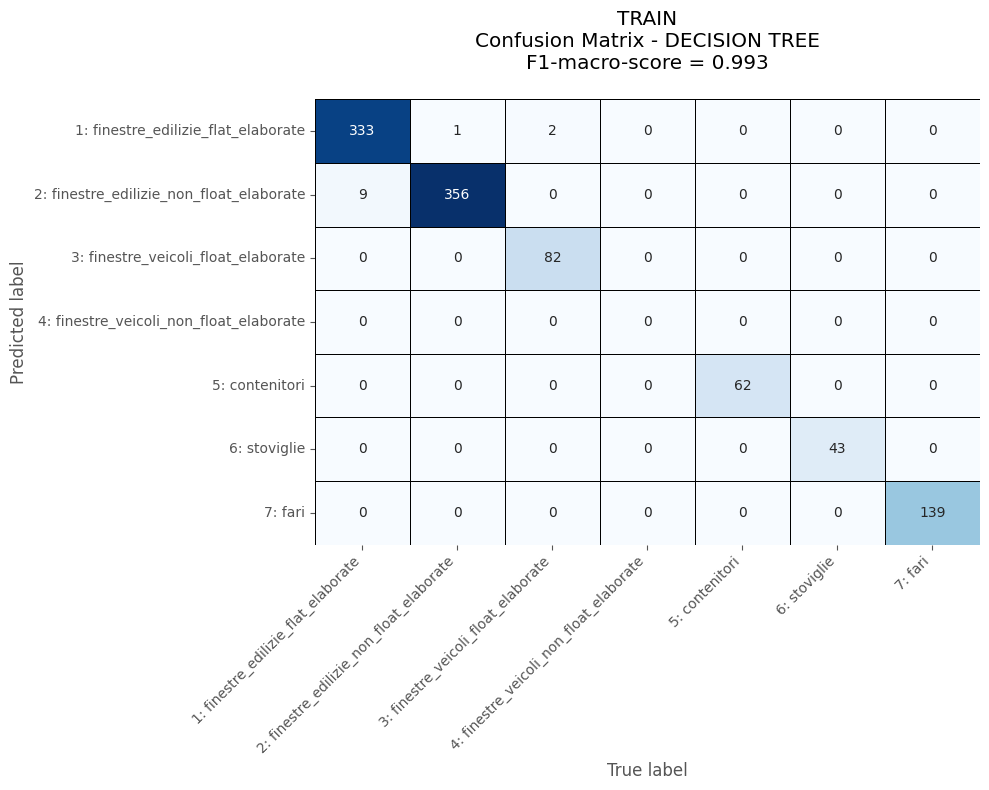

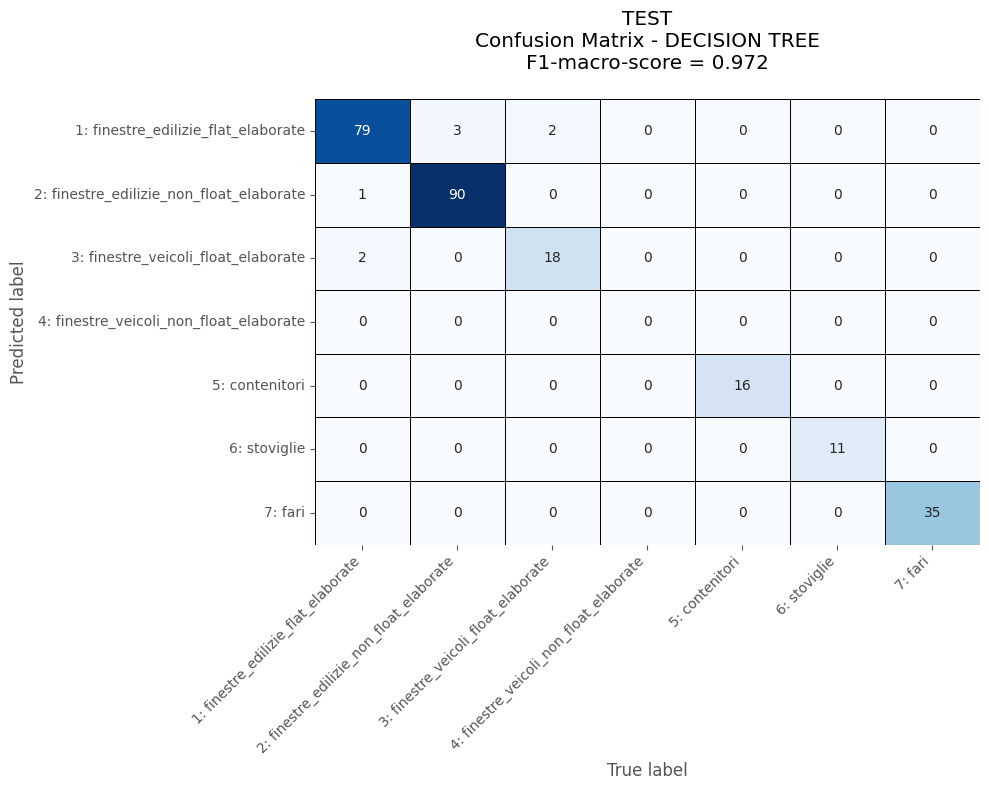

In [33]:

cm_train = confusion_matrix(y_train, y_pred_train,labels=np.arange(len(targets))+1)
cm_test = confusion_matrix(y_test,y_pred_test,labels=np.arange(len(targets))+1)


titolo_metodo= 'DECISION TREE'


plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TRAIN\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_train:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TEST\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_test:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Analisi dell'Addestramento: Learning Curve e Overfitting/Underfitting

Dopo aver selezionato il modello ottimale tramite la procedura di **Grid Search**, si analizza il comportamento in fase di addestramento attraverso due approcci distinti: la **learning curve** e lo **studio di overfitting/underfitting**.

Nel primo caso, la *learning curve* consente di osservare l’andamento del punteggio **F1 Macro** al variare della quantità di campioni utilizzati durante l’addestramento, sia sul training set che su quello di validazione. Questo grafico permette di valutare la capacità del modello di apprendere in funzione della dimensione del dataset.

Nel secondo caso, la valutazione di **underfitting** e **overfitting** risulta meno immediata. Per osservare come l’errore percentuale evolve al crescere della complessità del modello, nel caso di un **albero decisionale** espressa dalla profondità massima `max_depth`, è necessario eseguire una **nuova Grid Search**. In questa seconda analisi, si mantengono fissi tutti gli iperparametri ottimali individuati in precedenza, ad eccezione della profondità dell’albero, che viene fatta variare su un intervallo definito. Così facendo si può visualizzare l’errore su training e validazione per ciascun valore di profondità, per eventualmente individuare casi di **underfitting** o di **overfitting**.

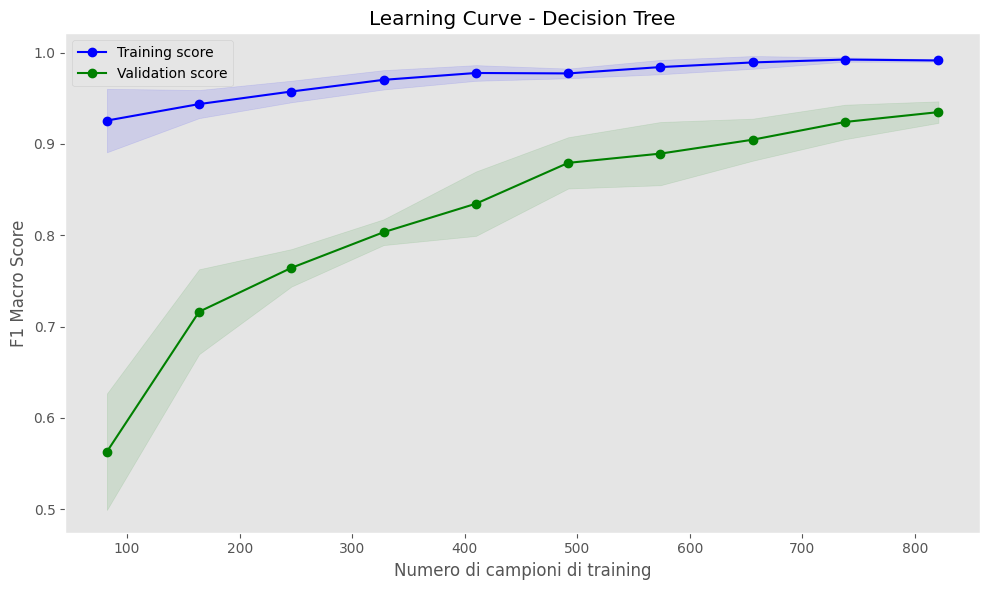

Fitting 5 folds for each of 50 candidates, totalling 250 fits


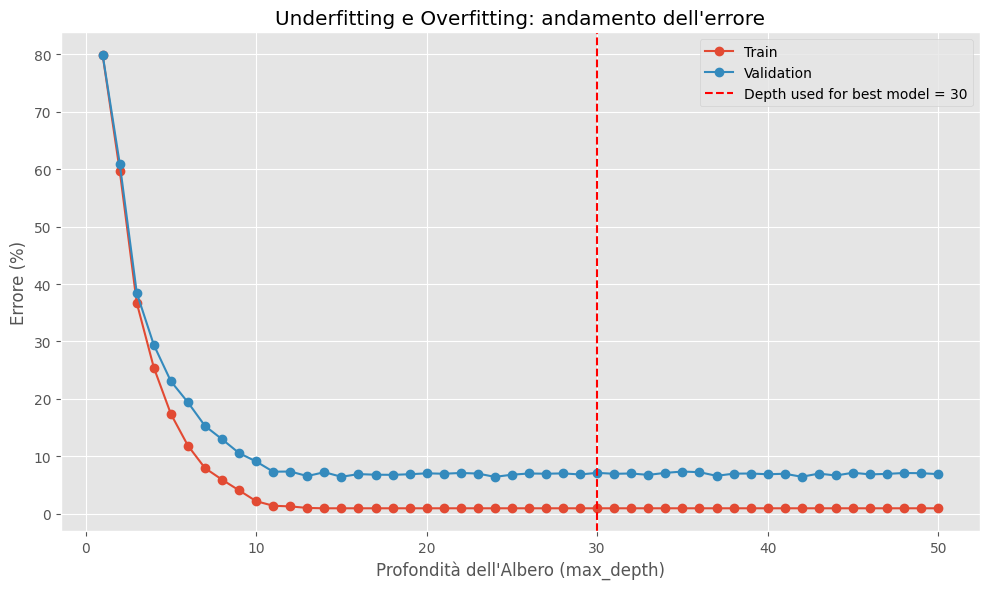

In [34]:
#LEARNING CURVE

##########################################################
#unica cosa da cambiare per learning curve a seconda del modello
estimator=best_estimator_DT
##########################################################

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=estimator,
    X=x_train_final,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=K_FOLD,
    scoring='f1_macro',
    shuffle=True,
    random_state=42,
    n_jobs=-1
)


#######################################################################
# #grafico

# Calcolo media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot della curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, valid_mean, 'o-', color="green", label="Validation score")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")

plt.title("Learning Curve - Decision Tree")
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


####################################################################################
#Underfitting e overfitting

depths = list(range(1, 51))  # da 1 a 50

#creo un albero con tutti i parametri trovati dal modello migliore (ovvero quello che vogliamo studiare), ad eccezione della depth
###############################################################################################################################
# #attento: cambia best_params_DT con i best_params_ del modello che stai studiando
model_DT_under_over_fitting = DecisionTreeClassifier(
        criterion=best_params_DT['criterion'],
        min_samples_split=best_params_DT['min_samples_split'],
        min_impurity_decrease=best_params_DT['min_impurity_decrease'])

#faccio grid search solo modificando la depth, usando return_train_score=True per salvare l'andamento di apprendimento al crescere della depth
grid_search_depth = GridSearchCV(
    estimator=model_DT_under_over_fitting,
    param_grid={'max_depth': depths},
    scoring='f1_macro',
    cv=K_FOLD,
    return_train_score=True, #per mostrare l'andamento
    verbose=1
)

#faccio il fit sui dati 
grid_search_depth.fit(x_train_final, y_train)

results_depth = pd.DataFrame(grid_search_depth.cv_results_)

################################################################################################################################################
# Grafico
train_error = (1 - results_depth['mean_train_score']) * 100
val_error = (1 - results_depth['mean_test_score']) * 100

plt.figure(figsize=(10, 6))
plt.plot(results_depth['param_max_depth'], train_error, label='Train', marker='o')
plt.plot(results_depth['param_max_depth'], val_error, label='Validation', marker='o')
###############################################################################################################################
# #attento: cambia best_params_DT con i best_params_ del modello che stai studiando
plt.axvline(best_params_DT['max_depth'], color='red', linestyle='--', label=f"Depth used for best model = {best_params_DT['max_depth']}")
################################################################################################################################
plt.xlabel("Profondità dell'Albero (max_depth)")
plt.ylabel("Errore (%)")
plt.title("Underfitting e Overfitting: andamento dell'errore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



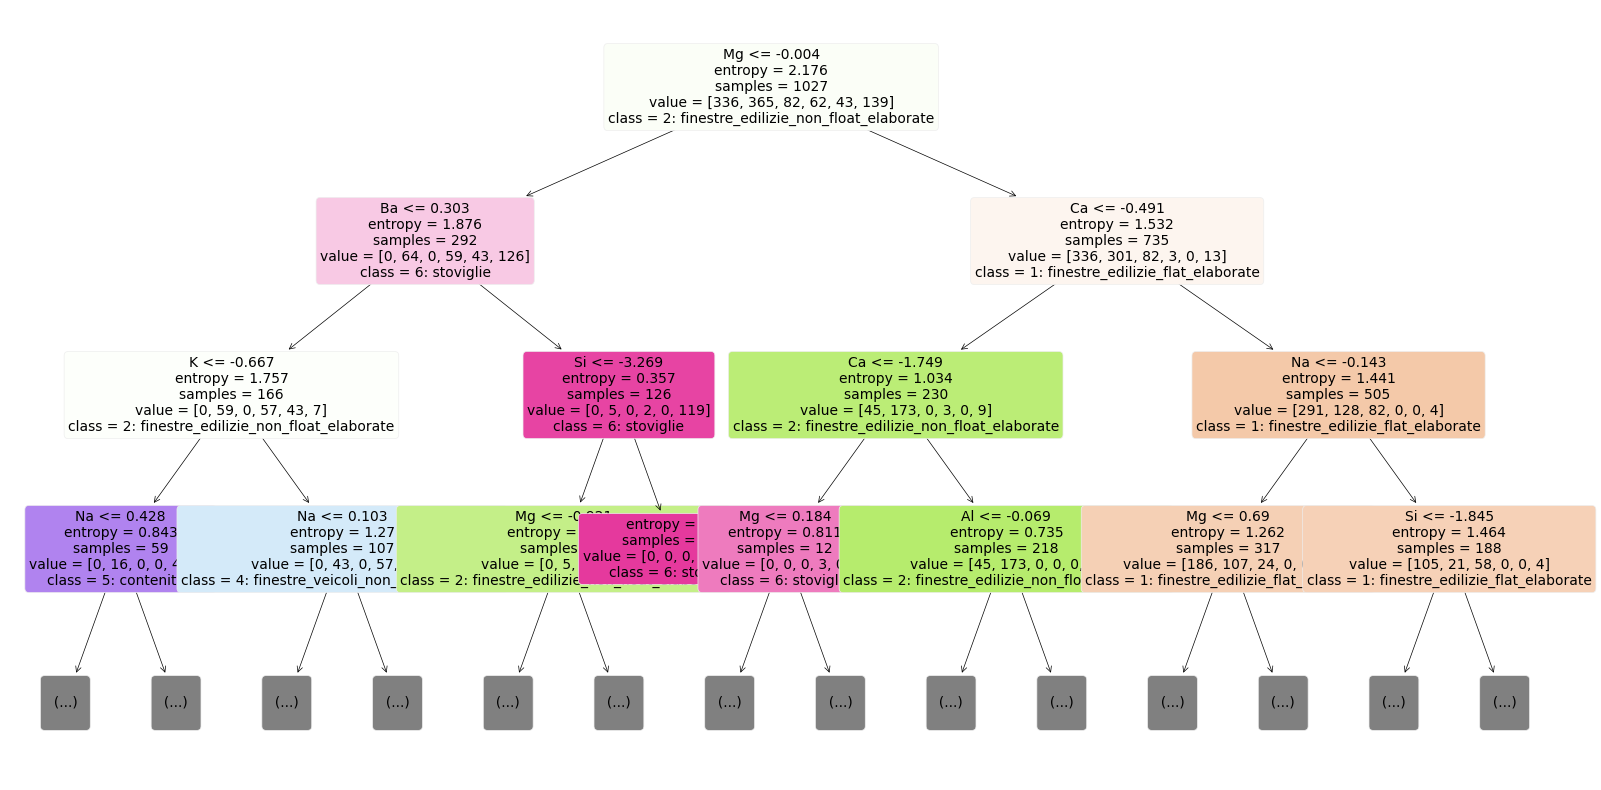

In [35]:
# Display the structure of the tree as a plot
plt.figure(figsize=(20, 10))
plot_tree(
    best_estimator_DT,
    feature_names=x_train_final.columns.tolist(),
    class_names=targets,  
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.show()


### Analisi delle prime decisioni dell'albero

Dall'osservazione della struttura dell'albero di decisione risultante, possiamo notare che la **prima suddivisione dei dati** è stata effettuata in base alla variabile *Mg*. Questo implica che, tra tutte le feature disponibili, *Mg* è risultata quella in grado di fornire la **maggiore riduzione dell'entropia**, ovvero la massima informazione utile per separare le classi presenti nel dataset in modo *omogeneo*.

Tale comportamento è coerente con quanto osservabile nel **box plot delle distribuzioni di *Mg* per ciascuna classe**: i valori della feature *Mg* mostrano una chiara capacità di discriminazione tra i gruppi, separandoli in modo netto e minimizzando l'overlap tra le distribuzioni delle classi. 

Dopo questa prima decisione, l'albero procede con ulteriori suddivisioni:
- Per i campioni con *Mg ≤ -0.004*, la seconda feature selezionata è *Ba*, che consente di affinare ulteriormente la distinzione tra le classi in quel sottoinsieme di dati.
- Per i campioni con *Mg > -0.004*, invece, la decisione successiva si basa sulla variabile *Ca*, che si è dimostrata la più informativa in quella porzione del dataset.

**Si noti** che i valori soglia ottenuti, sono ricavati dopo standardizzazione e preprocessing dei dati e dunque non saranno gli stessi valori che possiamo trovare nel dataset di train originale non trattato.

Anche queste scelte sono giustificate dalle **distribuzioni visibili nei box plot delle rispettive feature** (*Ba* e *Ca*).
Inoltre, sia dal boxplot del 1° step che dallo scatterplot del 2°, si può notare come le classi 1 e 3 siano interamente contenute nel sottogruppo di campioni con valore di Mg > -0.004, non presentando alcun campione nelle distribuzioni
per Mg<=-0.004. (Nel 2° step è stato mostrato lo scatterplot delle distribuzioni per rendere più evidente il numero effettivo di campioni)

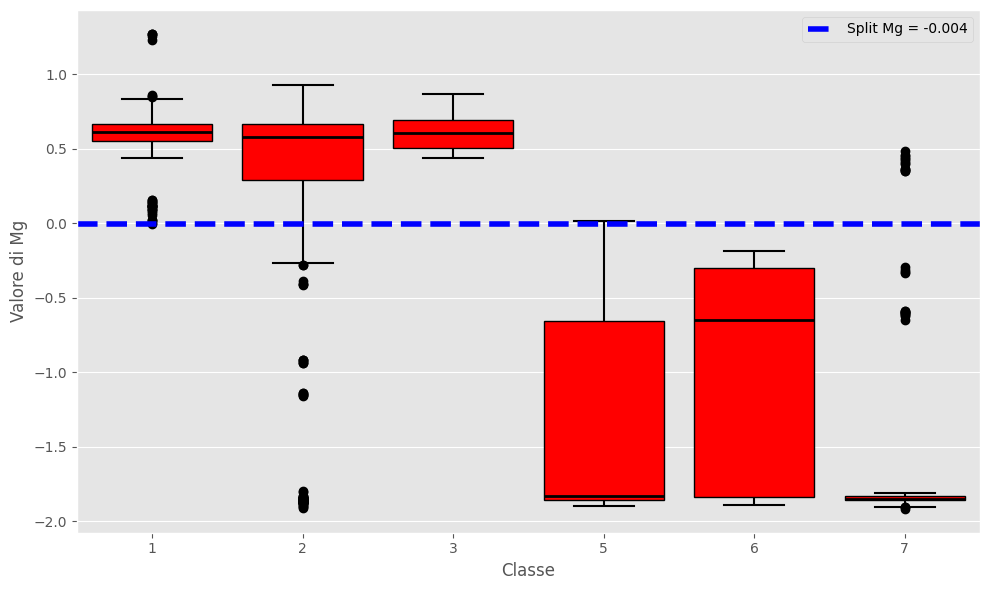

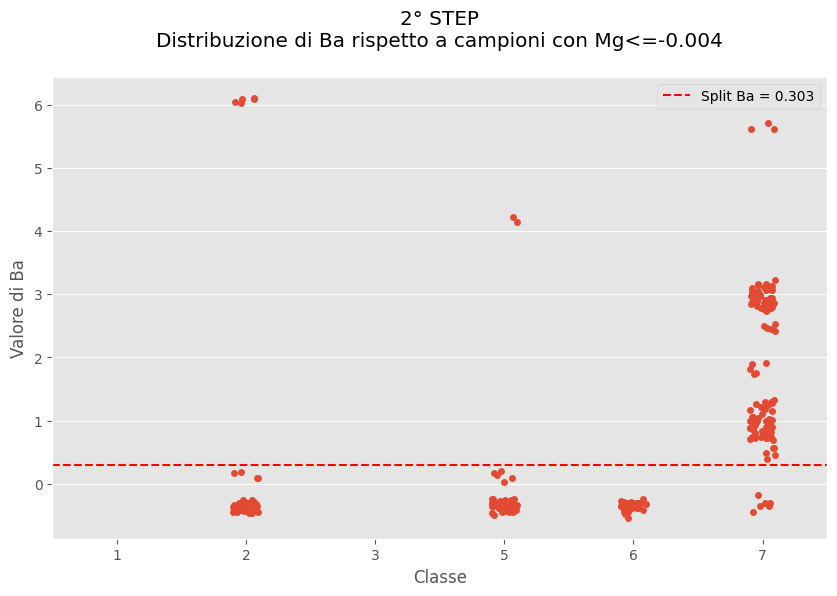

' #Ca\nplt.figure(figsize=(10, 6))\nsns.stripplot(x=y_train, y=x_mg_sopra[\'Ca\'])  \nplt.axhline(y=0.303, color=\'red\', linestyle=\'--\', label=\'Split Ba = 0.303\')\nplt.xlabel("Classe")\nplt.ylabel("Valore di Ba")\nplt.title("2° STEP\nDistribuzione di Ca rispetto a campioni con Mg>-0.004\n")\nplt.legend()\nplt.show() '

In [36]:
#Box plot rispetto alla variabile di divisione per ciascun sottoinsieme

#prima divisione


plt.figure(figsize=(10, 6))

sns.boxplot(
    x=y_train,
    y=x_train_final['Mg'],
    flierprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=6),
    boxprops=dict(facecolor='red', edgecolor='black'),      # box rosso con bordo nero
    medianprops=dict(color='black', linewidth=2),           # linea mediana nera
    whiskerprops=dict(color='black', linewidth=1.5),        # linee verticali nere
    capprops=dict(color='black', linewidth=1.5)             # linee orizzontali nere
)

# Linea di split
plt.axhline(y=-0.004, color='blue', linestyle='--', linewidth=4, label='Split Mg = -0.004')

# Etichette
plt.xlabel("Classe")
plt.ylabel("Valore di Mg")
#plt.title("1° STEP\nDistribuzione di Mg rispetto a tutti i campioni\n")
plt.legend()
plt.tight_layout()
plt.show()







#seconda divisione
mask_sotto= x_train_final['Mg']<=-0.004
mask_sopra=x_train_final['Mg']>-0.004

x_mg_sotto=x_train_final[mask_sotto]
x_mg_sopra=x_train_final[mask_sopra]

#Ba
plt.figure(figsize=(10, 6))
sns.stripplot(x=y_train, y=x_mg_sotto['Ba'])  
plt.axhline(y=0.303, color='red', linestyle='--', label='Split Ba = 0.303')
plt.xlabel("Classe")
plt.ylabel("Valore di Ba")
plt.title("2° STEP\nDistribuzione di Ba rispetto a campioni con Mg<=-0.004\n")
plt.legend()
plt.show()

""" #Ca
plt.figure(figsize=(10, 6))
sns.stripplot(x=y_train, y=x_mg_sopra['Ca'])  
plt.axhline(y=0.303, color='red', linestyle='--', label='Split Ba = 0.303')
plt.xlabel("Classe")
plt.ylabel("Valore di Ba")
plt.title("2° STEP\nDistribuzione di Ca rispetto a campioni con Mg>-0.004\n")
plt.legend()
plt.show() """

## K-Nearest Neighbors (KNN)

KNN **non esegue un vero addestramento**: è un **lazy learner**, ovvero non costruisce un modello esplicito ma **memorizza l’intero dataset di training** e la fase di predizione avviene solo al momento della classificazione.


Per ogni campione da classificare:

1. Si calcola la **distanza** tra il punto test e **tutti i punti del training set** (solitamente distanza euclidea).
2. Si selezionano i **K punti più vicini** secondo una **metrica a scelta**.
3. Si predice la **classe** del campione in base ai label dei k campioni di training più vicini.
4. Questa classe viene assegnata al punto test.

E questo processo viene **ripetuto per ogni sample** del test set.

Si noti che, essendo un algoritmo che utilizza le distanze, prima di essere applicato è necessario aver precedentemente **standardizzato** i dati sia di training che di test (questo step è già stato eseguito nel preprocessing in questo caso).

Poichè il daaset utilizzato risulta molto piccolo, si prevede di ottenere buoni risultati con questo approccio.

Gli **iperparametri** da testare per questo modello sono dunque:
- k : numero di samples da considerare per ogni predizione
- metrica : utilizzata per determinare le distanze
- pesi : che vengono dati ai label di ciascuno dei k vicini per la predizione del campione (può essere ad esempio scelta la classe piu frequente o può essere dato un peso maggiore ai campioni di test che risultano più vicini)
- algoritmo : utilizzato per ricercare i samples vicini

Anche in questo caso, per selezionare la miglior combinazione di iperparametri, viene sfruttato il **GridSearch** precedentemente descritto. Si noti che in questo caso per la parte di fit, **non** avviene alcuna vera **fase di addestramento**  poiché KNN è un algoritmo lazy learner, e vengono dunque semplicemente predetti per ogni fold i campioni del validation set cercando i campioni vicini nei fold utilizzati per il training.


In [37]:
K_FOLD=5


model_KNN=KNeighborsClassifier()
n_neighbors=np.arange(2,20)
weights=['uniform', 'distance']
metric=['euclidean', 'manhattan']
algorithm=['auto', 'ball_tree']


grid_search_KNN = GridSearchCV(
    estimator = model_KNN,
    param_grid={
        'n_neighbors': n_neighbors,
        'weights': weights,
        'metric': metric,
        'algorithm': algorithm
    },
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1,
)

model_KNN = grid_search_KNN.fit(x_train_final,y_train)


best_estimator_KNN=model_KNN.best_estimator_

y_pred_train= best_estimator_KNN.predict(x_train_final)
y_pred_test= best_estimator_KNN.predict(x_test_final)


f1_macro_train = f1_score(y_train, y_pred_train, average='macro')
f1_macro_test = f1_score(y_test, y_pred_test, average='macro')


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [38]:
results_KNN = pd.DataFrame(grid_search_KNN.cv_results_)
results_KNN = results_KNN.sort_values(by='rank_test_score', ascending=True)
results_KNN.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
109,0.011000,0.008318,0.029073,0.016156,ball_tree,manhattan,2,distance,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",0.953381,0.930501,0.940413,0.938502,0.950971,0.942754,0.008416,1
37,0.005536,0.005720,0.013636,0.007596,auto,manhattan,2,distance,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.953381,0.930501,0.940413,0.938502,0.950971,0.942754,0.008416,1
113,0.002607,0.002276,0.011787,0.006238,ball_tree,manhattan,4,distance,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",0.915479,0.941427,0.931945,0.945584,0.939548,0.934797,0.010623,3


In [39]:
best_params_KNN=model_KNN.best_params_
print(f'La miglior combinazione di iperparametri ottenuta è : {best_params_KNN}\nTale combinazione ottiene un F1 Score Macro sul train set di {model_KNN.best_score_}')

La miglior combinazione di iperparametri ottenuta è : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Tale combinazione ottiene un F1 Score Macro sul train set di 0.9427535841199125


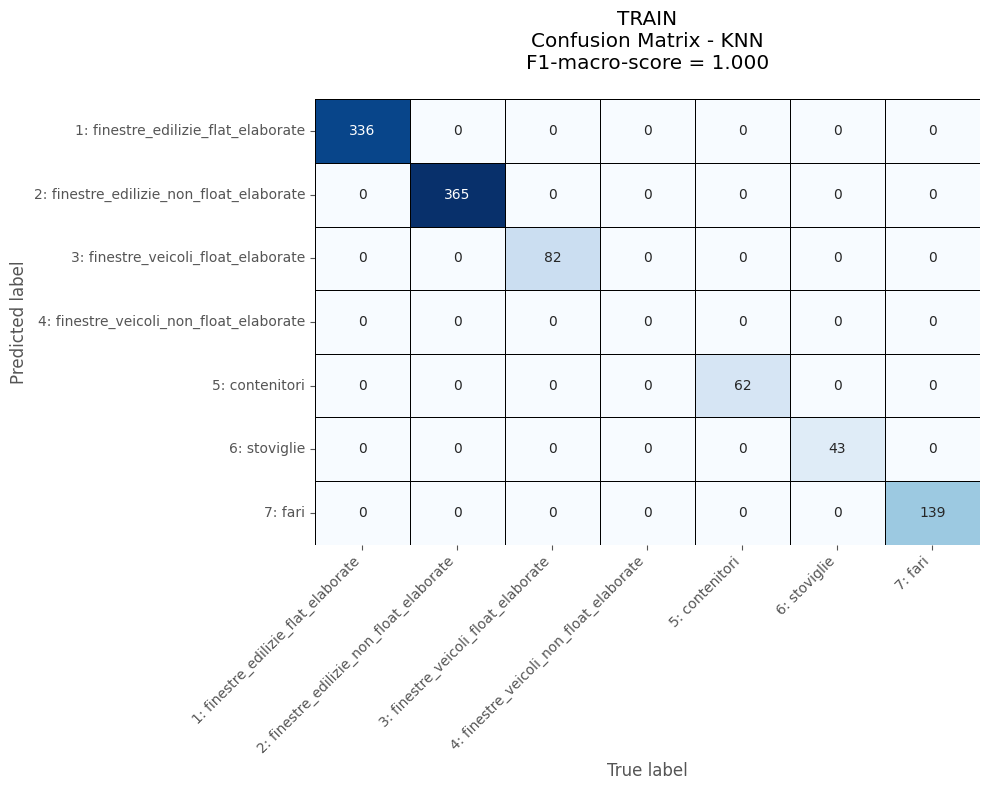

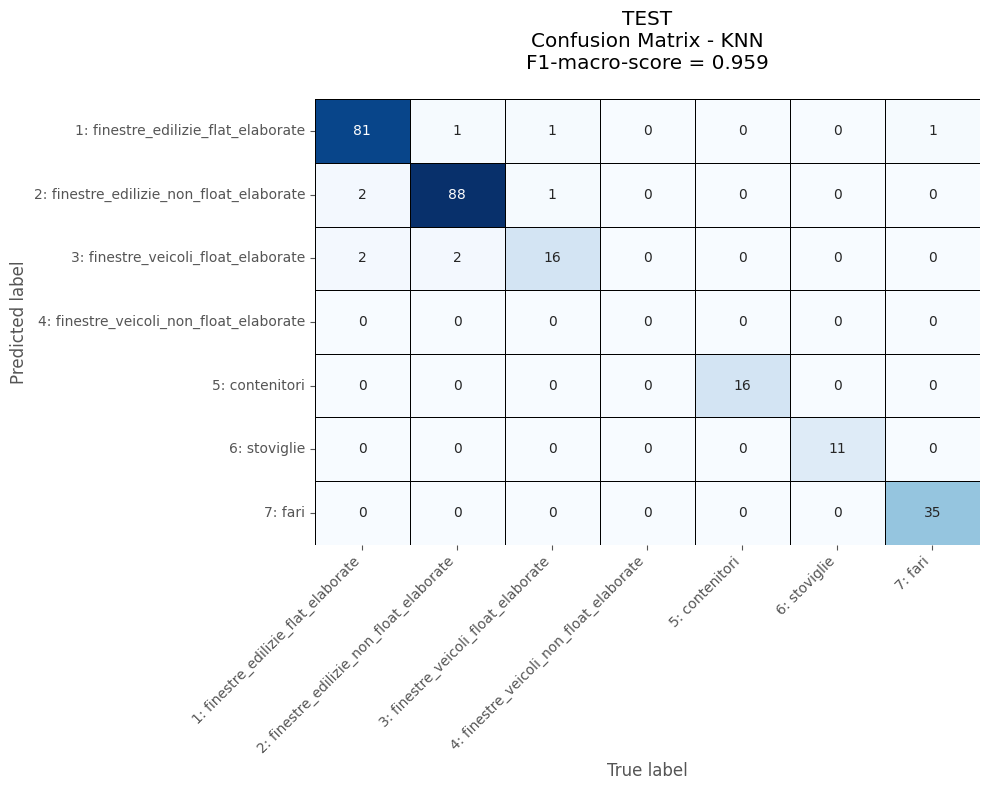

In [40]:
cm_train = confusion_matrix(y_train, y_pred_train,labels=np.arange(len(targets))+1)
cm_test = confusion_matrix(y_test,y_pred_test,labels=np.arange(len(targets))+1)

titolo_metodo= 'KNN'

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TRAIN\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_train:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TEST\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_test:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

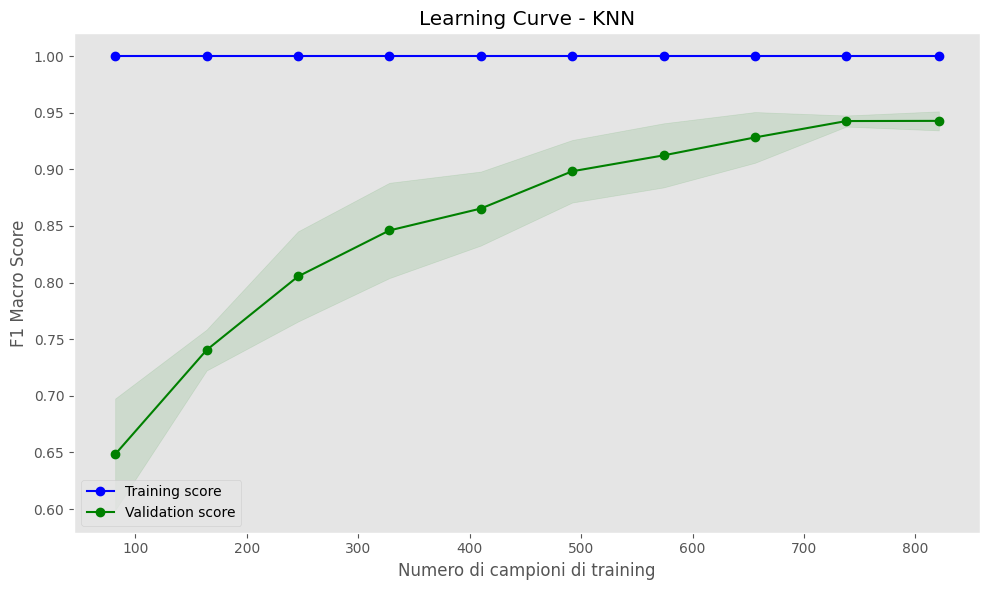

Fitting 5 folds for each of 29 candidates, totalling 145 fits


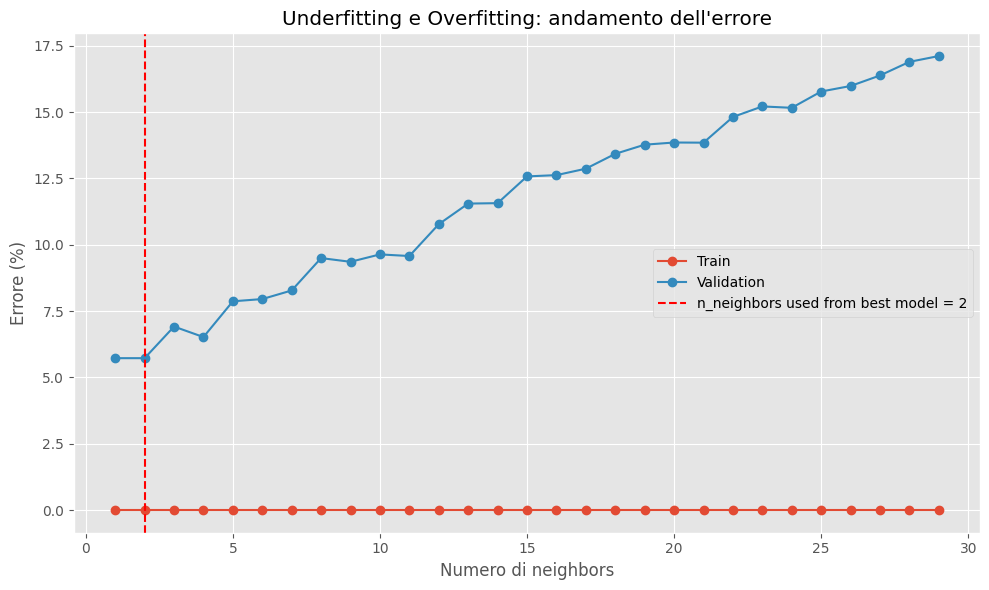

In [41]:
#LEARNING CURVE
##########################################################
#unica cosa da cambiare per learning curve a seconda del modello
estimator=best_estimator_KNN
##########################################################


train_sizes, train_scores, valid_scores = learning_curve(
    estimator=estimator,
    X=x_train_final,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=K_FOLD,
    scoring='f1_macro',
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

 #grafico

# Calcolo media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot della curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, valid_mean, 'o-', color="green", label="Validation score")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")

plt.title("Learning Curve - KNN")
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


####################################################################################
#Underfitting e overfitting

n_neighbors=np.arange(1,30)

model_KNN_under_over_fitting=KNeighborsClassifier(
                        weights= best_params_KNN['weights'], 
                        metric=best_params_KNN['metric'] ,
                        algorithm= best_params_KNN ['algorithm']
                                )


grid_search_neighbors = GridSearchCV(
    estimator = model_KNN_under_over_fitting,
    param_grid={
        'n_neighbors': n_neighbors,
          
    },
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1,
    return_train_score=True, #per mostrare l'andamento

)



grid_search_neighbors.fit(x_train_final, y_train)
results_neighbors = pd.DataFrame(grid_search_neighbors.cv_results_)



################################################################################################################################################
# Grafico
train_error = (1 - results_neighbors['mean_train_score']) * 100
val_error = (1 - results_neighbors['mean_test_score']) * 100

plt.figure(figsize=(10, 6))
plt.plot(results_neighbors['param_n_neighbors'], train_error, label='Train', marker='o')
plt.plot(results_neighbors['param_n_neighbors'], val_error, label='Validation', marker='o')
###############################################################################################################################
# #attento: cambia best_params_DT con i best_params_ del modello che stai studiando
plt.axvline(best_params_KNN['n_neighbors'], color='red', linestyle='--', label=f"n_neighbors used from best model = {best_params_KNN['n_neighbors']}")
################################################################################################################################
plt.xlabel("Numero di neighbors")
plt.ylabel("Errore (%)")
plt.title("Underfitting e Overfitting: andamento dell'errore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Nota sul comportamento apparente di overfitting**

Anche se dai grafici può sembrare che il modello stia incorrendo in overfitting, dato che l'F1 Macro Score sul training set risulta sempre pari a 1, in realtà non è così.

L’iperparametro `weights` selezionato dalla Grid Search è impostato su `'distance'`, il che significa che l’algoritmo assegna un peso ai vicini inversamente proporzionale alla distanza (ovvero: peso = 1/distanza).

Poiché KNN è un algoritmo "lazy", che memorizza tutti i campioni del training set, quando si utilizza `.predict()` su un campione dello stesso training set, l’algoritmo trova sé stesso come vicino con distanza pari a zero. In questo caso, il peso assegnato al proprio label tende a infinito e il modello assegna la stessa etichetta con probabilità 1.

Ne consegue che, indipendentemente dagli altri iperparametri, qualsiasi modello KNN con `weights='distance'` predirà sempre correttamente su tutti i campioni del training set, portando a un F1 Macro Score perfetto in quella fase — ma questo **non implica automaticamente overfitting**, bensì è un effetto naturale del funzionamento interno dell’algoritmo.


## SVM Multiclasse (Support Vector Machine)

Un **SVM multiclasse** è un'estensione dell'algoritmo **Support Vector Machine Binario**, ovvero utilizzato per problemi di classificazione binaria, al caso in cui siano presenti **più di due classi**.


L' SVM binario ha lo scopo principale di trovare un **iperpiano di separazione ottimale** che massimizzi il margine tra due classi. 
Se il problema è multiclasse, l’algoritmo viene adattato utilizzando uno dei seguenti due metodi:


-One-vs-Rest (OvR)

- Per **C classi**, vengono costruiti **C classificatori binari**.
- Ogni classificatore è addestrato per distinguere **una classe contro tutte le altre**.
- Per ciascun nuovo campione, ogni classificatore fornisce un **punteggio decisionale**.
- Il campione viene assegnato alla classe con il **punteggio più alto**.

-One-vs-One (OvO)

- Per **C classi**, si costruiscono **C(C−1)/2** classificatori, ovvero uno per ogni possibile coppia di classi.
- Ogni classificatore vota la classe di appartenenza del campione.
- Il campione viene assegnato alla classe che **riceve più voti**.

Altri due iperparametri fondamentali nel modello SVM sono **`C`** e **`kernel`**.

- Il parametro **`C`** , utile quando le classi **non sono perfettamente separabili** da un iperpiano, regola la penalizzazione associata ai punti classificati in modo errato nel set di addestramento. Un valore basso di `C` consente un margine più ampio tollerando alcuni errori, mentre un valore alto penalizza fortemente le misclassificazioni.

- Il parametro **`kernel`** è invece necessario quando **non è possibile separare linearmente le classi nello spazio originale delle feature**. In questi casi, viene utilizzata una funzione kernel per **proiettare i dati in uno spazio a dimensionalità superiore**, dove è più probabile trovare un iperpiano che separi correttamente le classi.



In [42]:
K_FOLD=5


model_SVM = SVC(random_state=31415,probability=True)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

grid_search_SVM = GridSearchCV(
    estimator=model_SVM,
    param_grid=param_grid,
    scoring='f1_macro',
      cv=K_FOLD,
    verbose=1,
    n_jobs=-1
)



model_SVM = grid_search_SVM.fit(x_train_final,y_train)


best_estimator_SVM=model_SVM.best_estimator_

y_pred_train= best_estimator_SVM.predict(x_train_final)
y_pred_test= best_estimator_SVM.predict(x_test_final)


f1_macro_train = f1_score(y_train, y_pred_train, average='macro')
f1_macro_test = f1_score(y_test, y_pred_test, average='macro')


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [43]:
results_SVM = pd.DataFrame(grid_search_SVM.cv_results_)
results_SVM = results_SVM.sort_values(by='rank_test_score', ascending=True)
results_SVM.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.327879,0.012880,0.031940,0.002142,10,ovr,scale,rbf,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.891054,0.86345,0.901478,0.845822,0.903874,0.881136,0.022755,1
28,0.319169,0.011927,0.029245,0.006566,10,ovo,auto,rbf,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.891054,0.86345,0.901478,0.845822,0.903874,0.881136,0.022755,1
25,0.343667,0.026524,0.033505,0.007130,10,ovo,scale,rbf,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.891054,0.86345,0.901478,0.845822,0.903874,0.881136,0.022755,1


In [44]:
best_params_SVM = model_SVM.best_params_
print(f'La miglior combinazione di iperparametri ottenuta è : {best_params_SVM}\nTale combinazione ottiene un F1 Score Macro sul train set di {model_SVM.best_score_}')

La miglior combinazione di iperparametri ottenuta è : {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Tale combinazione ottiene un F1 Score Macro sul train set di 0.8811356168110309


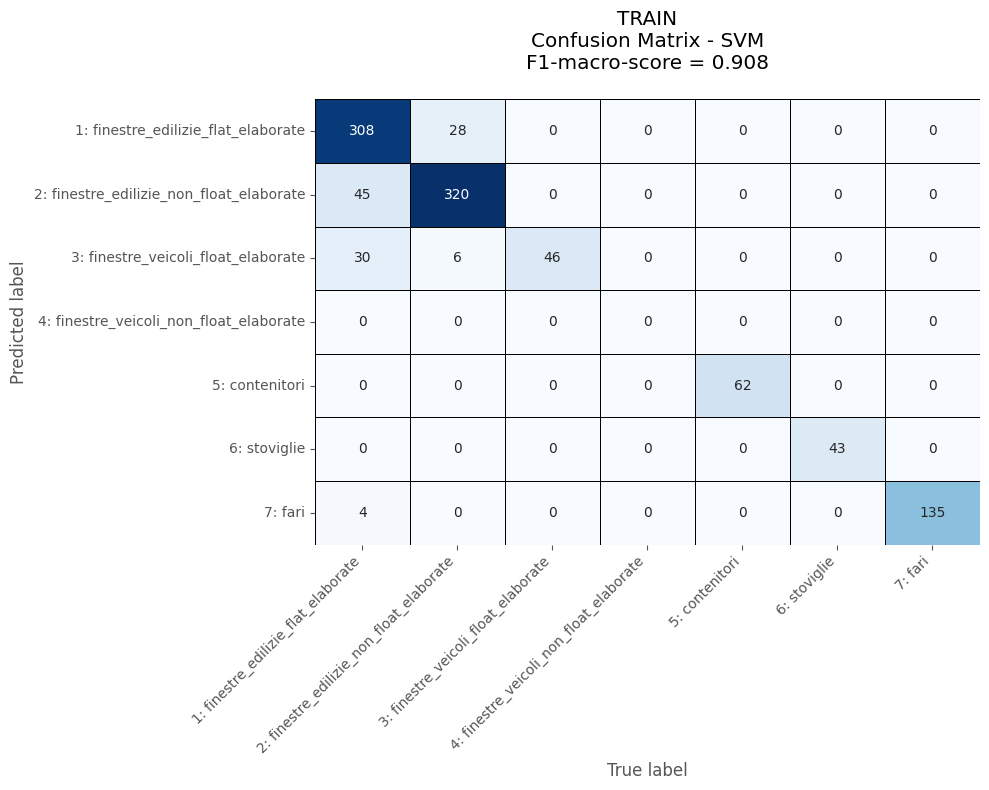

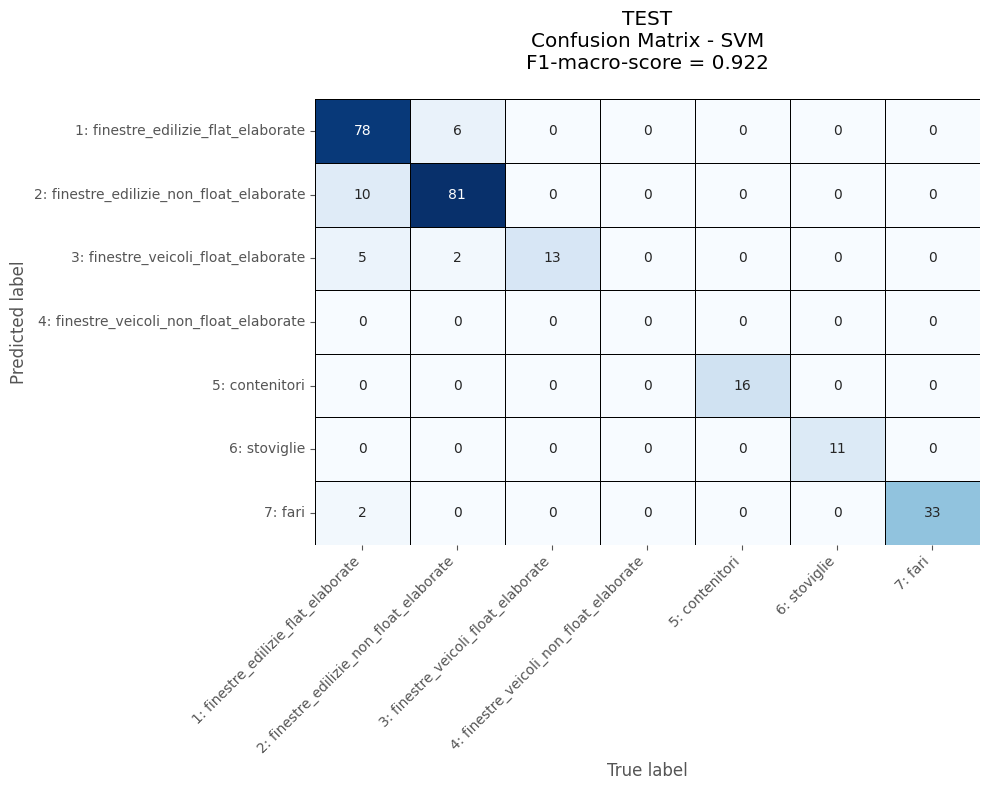

In [45]:
cm_train = confusion_matrix(y_train, y_pred_train,labels=np.arange(len(targets))+1)
cm_test = confusion_matrix(y_test,y_pred_test,labels=np.arange(len(targets))+1)

titolo_metodo= 'SVM'

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TRAIN\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_train:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TEST\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_test:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

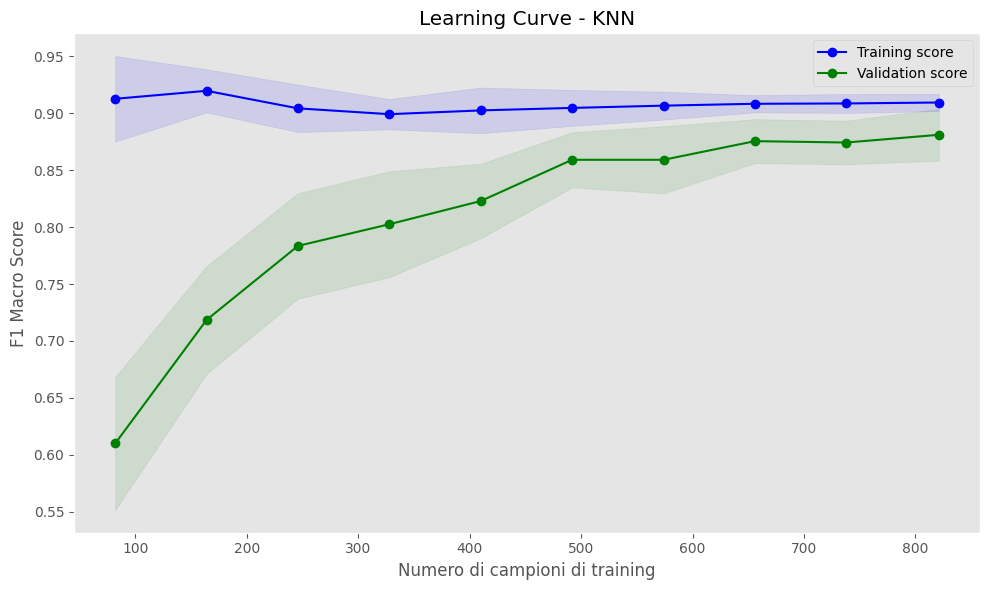

In [46]:
#LEARNING CURVE
##########################################################
#unica cosa da cambiare per learning curve a seconda del modello
estimator=best_estimator_SVM
##########################################################


train_sizes, train_scores, valid_scores = learning_curve(
    estimator=estimator,
    X=x_train_final,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=K_FOLD,
    scoring='f1_macro',
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

 #grafico

# Calcolo media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot della curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, valid_mean, 'o-', color="green", label="Validation score")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")

plt.title("Learning Curve - KNN")
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()




### Visualizzazione delle Classificazioni SVM in 2D

Le classificazioni effettuate tramite SVM risultano facilmente interpretabili e visualizzabili quando il dataset ha 2 o 3 dimensioni. Tuttavia, quando il numero di feature è superiore, una rappresentazione grafica diretta diventa impraticabile.

Per mostrare in maniera intuitiva come i punti del test set sono stati classificati, si è seguito questo procedimento:

- Predetto `y_test` utilizzando il modello SVM ottimizzato.
- Applicata la **PCA** per ridurre le feature del test set a 2 componenti principali.
- Proiettato i punti predetti nel nuovo spazio 2D.
- Colorato ciascun punto in base alla classe predetta, se correttamente classificato.
- Evidenziato con una croce nera i punti misclassificati.

 È importante notare che la visualizzazione delle **regioni di decisione** nello spazio 2D è **approssimativa**:  
in qaunto la riduzione dimensionale tramite PCA non è un'applicazione iniettiva e distorce le vere geometrie delle superfici di separazione.


C:\Users\ANDY\AppData\Local\Temp\ipykernel_9752\548102348.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(classi_predette))


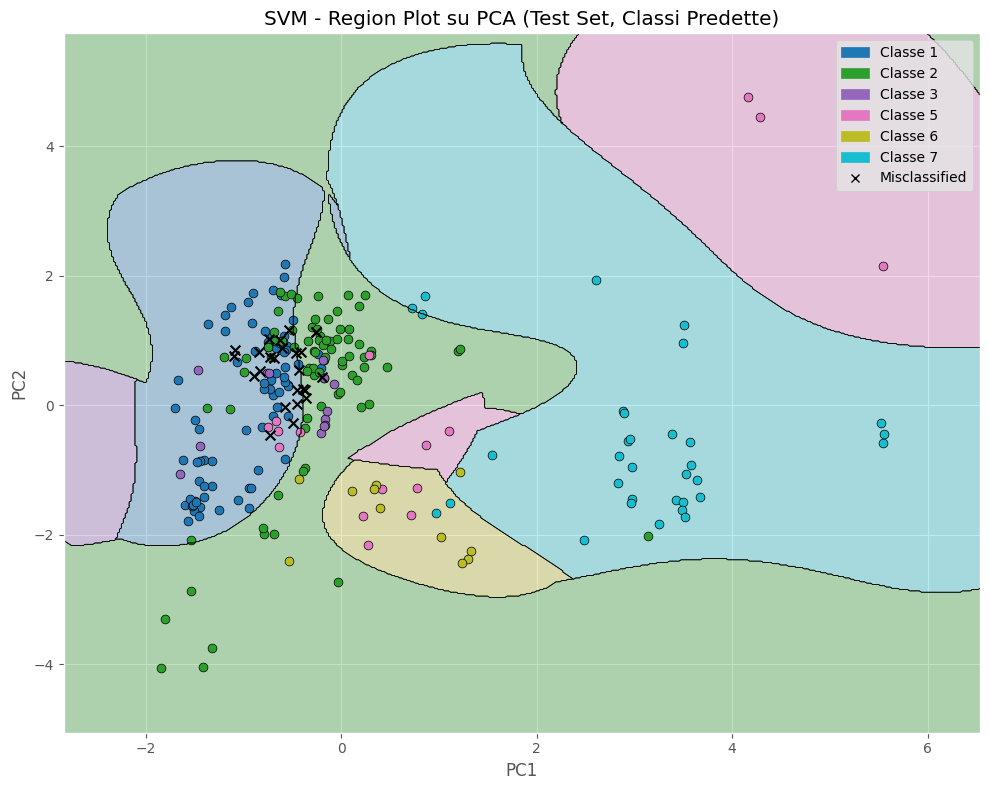

In [47]:
misclassified = y_pred_test != y_test

# PCA sul test set per visualizzazione
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(x_test_final)

# Traino un SVM 2D per ottenere le zone sullo spazio proiettato (solo per visualizzazione)
svm_pca = SVC(C=10, kernel='rbf', gamma='scale', decision_function_shape='ovo')
svm_pca.fit(X_test_pca, y_pred_test)  # y_pred_test: usiamo le classi predette come "verità"

# Griglia per il region plot
h = .02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colori coerenti
classi_predette = np.unique(y_pred_test)
cmap = plt.cm.get_cmap('tab10', len(classi_predette))
class_to_color = {classe: cmap(i) for i, classe in enumerate(classi_predette)}

# Plot 
plt.figure(figsize=(10, 8))

# Regioni colorate con contorni neri
for classe, colore in class_to_color.items():
    plt.contourf(xx, yy, Z == classe, levels=[0.5, 1], alpha=0.3, colors=[colore])
    plt.contour(xx, yy, Z == classe, levels=[0.5], colors='k', linewidths=0.5)

# Punti correttamente classificati
legend_handles = []
for classe in classi_predette:
    idx = (y_pred_test == classe) & (y_test == classe)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1],
                color=class_to_color[classe],
                edgecolors='k',
                label=f"Classe {classe}",
                s=40)
    legend_handles.append(mpatches.Patch(color=class_to_color[classe], label=f"Classe {classe}"))

# Punti classificati male
plt.scatter(X_test_pca[misclassified, 0],
            X_test_pca[misclassified, 1],
            color='black',
            marker='x',
            s=50,
            label='Misclassified')
legend_handles.append(plt.Line2D([], [], color='black', marker='x', linestyle='None', label='Misclassified'))

# Legenda 
plt.legend(handles=legend_handles)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SVM - Region Plot su PCA (Test Set, Classi Predette)")
plt.grid(True)
plt.tight_layout()
plt.show()

# MLP (Multilayer Perceptron)

Un **MLP** è una rete neurale artificiale feedforward, composta da almeno tre strati di neuroni: uno layer di input, uno o più layer nascosti e un layer di output. separabili grazie alla sua capacità di apprendere rappresentazioni complesse.

- Ogni strato nascosto è composto da neuroni che applicano una trasformazione non lineare (funzione di attivazione) ai dati. I valori di ciascun neurone vengono combinati linearmente per il layer successivo
- I pesi vengono aggiornati durante l'addestramento usando algoritmi di ottimizzazione come *SGD* o *Adam*.
- L’errore viene minimizzato mediante la backpropagation e il calcolo del gradiente.

**Iperparametri principali testati**:
- `hidden_layer_sizes`: struttura degli strati nascosti. Ad esempio: `(20,)`, `(30,30)`, `(10,10,10)`, `(50,)`
- `activation`: funzione di attivazione tra `relu`, `tanh`, `logistic`.
- `solver`: metodo di ottimizzazione, tra cui `adam` e `sgd`.
- `alpha`: parametro di regolarizzazione L2 (per evitare overfitting).
- `max_iter`: numero massimo di iterazioni 

La selezione degli iperparametri è stata effettuata tramite `GridSearchCV` come per i metodi precedentemente utilizzati.

Per l’analisi di overfitting e underfitting è stato possibile variare numerosi iperparametri della rete neurale.

Tuttavia, i grafici più significativi e interpretabili sono risultati quelli ottenuti:

- al variare del **numero di layer nascosti**, mantenendo costante il numero di neuroni per layer;
- al variare del **numero di neuroni** in un singolo **hidden layer**, per osservare l’effetto della capacità del modello.

Questi due casi verranno illustrati per comprendere meglio il comportamento del modello rispetto alla complessità dell'architettura.


In [48]:
K_FOLD=5



model_MLP = MLPClassifier()


hidden_layer_sizes=[(20,), (30,30), (10, 10, 10), (50,)]

grid_search_MLP = GridSearchCV(
    estimator = model_MLP,
    param_grid={
        'hidden_layer_sizes': hidden_layer_sizes ,
        'activation': ['relu'],#, 'tanh','logistic'],
        'max_iter': [3000],
        #'solver': ['adam', 'sgd'],
        #'alpha' : [1e-4, 1e-1],
        }  ,   
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=2,  
    n_jobs=1,
)

model_MLP = grid_search_MLP.fit(x_train_final, y_train)



best_estimator_MLP=model_MLP.best_estimator_

y_pred_train= best_estimator_MLP.predict(x_train_final)
y_pred_test= best_estimator_MLP.predict(x_test_final)


f1_macro_train = f1_score(y_train, y_pred_train, average='macro')
f1_macro_test = f1_score(y_test, y_pred_test, average='macro')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   6.5s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   7.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10, 10), max_it

In [49]:
results_MLP = pd.DataFrame(grid_search_MLP.cv_results_)
results_MLP = results_MLP.sort_values(by='rank_test_score', ascending=True)
results_MLP.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,5.747256,1.235984,0.005403,0.005504,relu,"(30, 30)",3000,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.941773,0.974899,0.972064,0.935125,0.962980,0.957368,0.016080,1
3,5.582765,0.679511,0.009421,0.005126,relu,"(50,)",3000,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.902982,0.951208,0.958383,0.915232,0.951788,0.935919,0.022374,2
0,5.658337,0.520808,0.006654,0.006219,relu,"(20,)",3000,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.915788,0.918697,0.919798,0.861819,0.950158,0.913252,0.028588,3


In [50]:
best_params_MLP = model_MLP.best_params_
print(f'La miglior combinazione di iperparametri ottenuta è : {best_params_MLP}\nTale combinazione ottiene un F1 Score Macro sul train set di {model_MLP.best_score_}')

La miglior combinazione di iperparametri ottenuta è : {'activation': 'relu', 'hidden_layer_sizes': (30, 30), 'max_iter': 3000}
Tale combinazione ottiene un F1 Score Macro sul train set di 0.9573680997248342


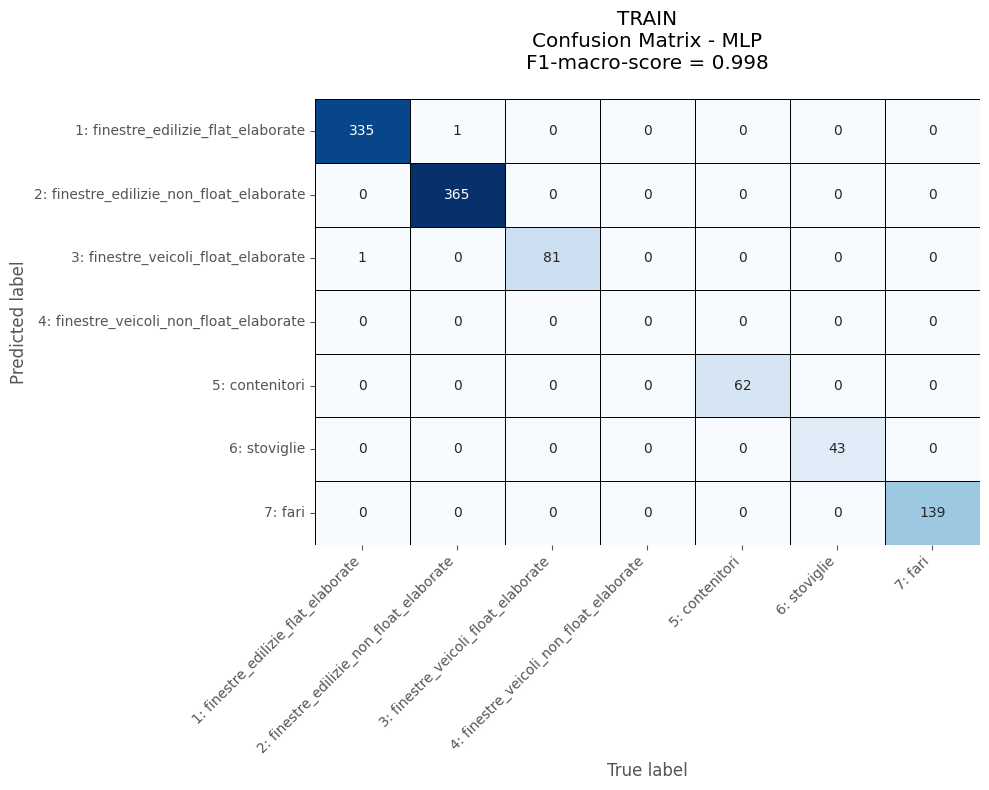

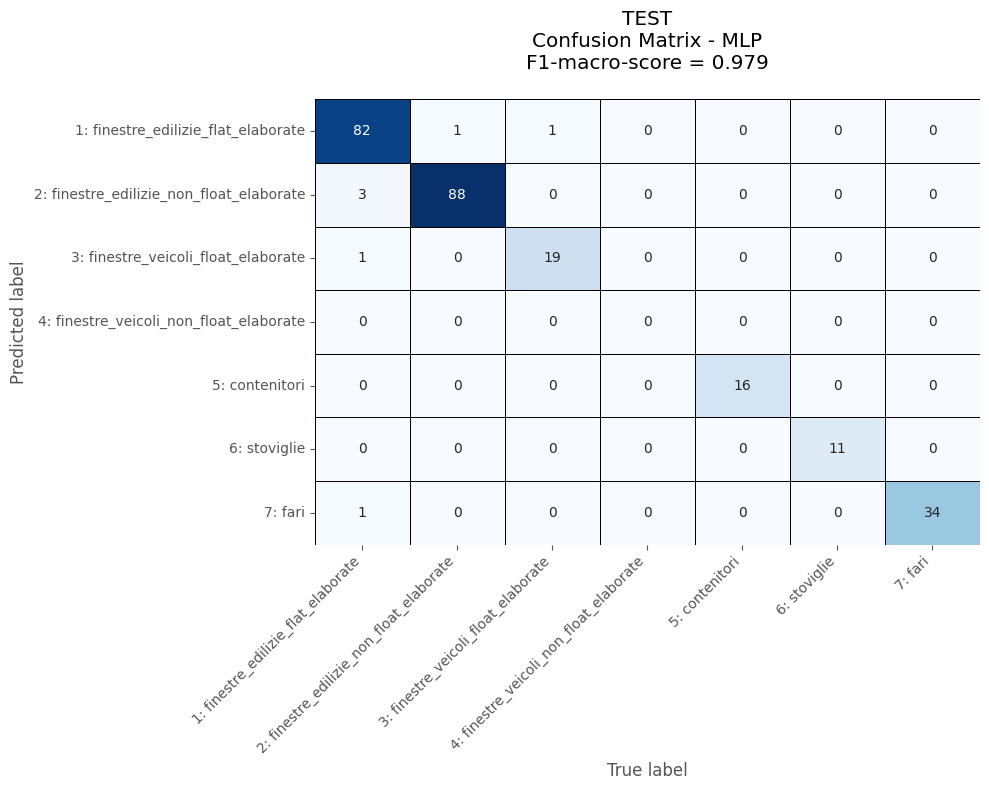

In [51]:
cm_train = confusion_matrix(y_train, y_pred_train,labels=np.arange(len(targets))+1)
cm_test = confusion_matrix(y_test,y_pred_test,labels=np.arange(len(targets))+1)

titolo_metodo= 'MLP'

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TRAIN\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_train:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=targets, yticklabels=targets, linewidths=0.7, linecolor='black' )
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title(f"TEST\nConfusion Matrix - {titolo_metodo}\nF1-macro-score = {f1_macro_test:.3f}\n")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

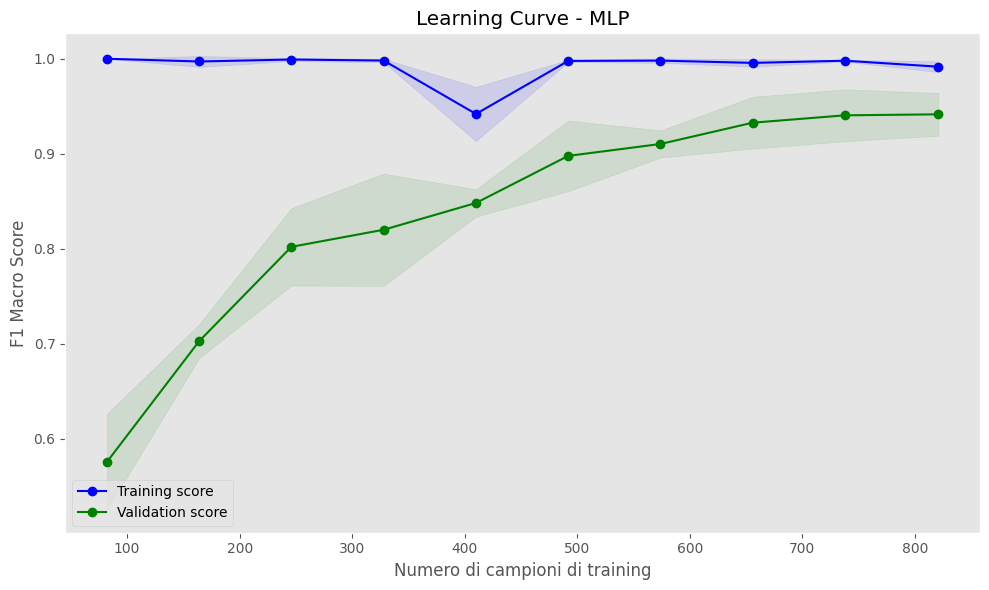

In [52]:
#LEARNING CURVE
##########################################################
#unica cosa da cambiare per learning curve a seconda del modello
estimator=best_estimator_MLP
##########################################################


train_sizes, train_scores, valid_scores = learning_curve(
    estimator=estimator,
    X=x_train_final,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=K_FOLD,
    scoring='f1_macro',
    shuffle=True,
    random_state=42,
    n_jobs=-1,
)

 #grafico

# Calcolo media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot della curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, valid_mean, 'o-', color="green", label="Validation score")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")

plt.title("Learning Curve - MLP")
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()




In [53]:
####################################################################################
#Underfitting e overfitting
from sklearn.neural_network import MLPClassifier

# Definisci le configurazioni dei layer
hidden_layer_sizes = [
    (10,), 
    (10, 10), 
    (10, 10, 10), 
    (10, 10, 10, 10), 
    (10, 10, 10, 10, 10),
    (10, 10, 10, 10, 10, 10),
    (10, 10, 10, 10, 10, 10, 10)
]

# Modello MLP con tutti gli iperparametri ottimali tranne i layer
model_MLP_under_over_fitting = MLPClassifier(
    #earning_rate=best_params_MLP['learning_rate'],
    activation=best_params_MLP['activation'],
    max_iter=best_params_MLP['max_iter'],
    #solver=best_params_MLP['solver'],
    #alpha=best_params_MLP['alpha'],
    random_state=31415
)

# GridSearch solo sul numero di hidden layers
grid_search_layers = GridSearchCV(
    estimator=model_MLP_under_over_fitting,
    param_grid={'hidden_layer_sizes': hidden_layer_sizes},
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
)

# Fit del modello
grid_search_layers.fit(x_train_final, y_train)
results_layers = pd.DataFrame(grid_search_layers.cv_results_)

# Calcolo degli errori
train_error = (1 - results_layers['mean_train_score']) * 100
val_error = (1 - results_layers['mean_test_score']) * 100




Fitting 5 folds for each of 7 candidates, totalling 35 fits


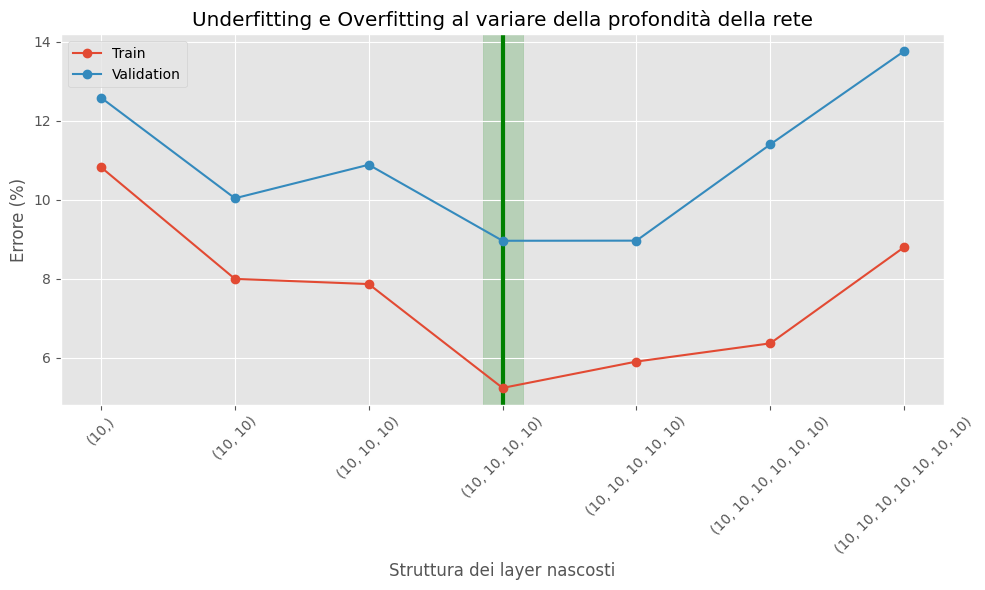

In [54]:
layer_labels = [str(l) for l in results_layers['param_hidden_layer_sizes']]

plt.figure(figsize=(10, 6))
plt.plot(layer_labels, train_error, label='Train', marker='o')
plt.plot(layer_labels, val_error, label='Validation', marker='o')

posizione = 3  
plt.axvspan(
    posizione - 0.15, posizione + 0.15, 
    color='green', alpha=0.2, zorder=0
)
plt.axvline(
    x=posizione, color='green', linewidth=3, zorder=1
)




plt.xlabel("Struttura dei layer nascosti")
plt.ylabel("Errore (%)")
plt.title("Underfitting e Overfitting al variare della profondità della rete")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 11 candidates, totalling 55 fits


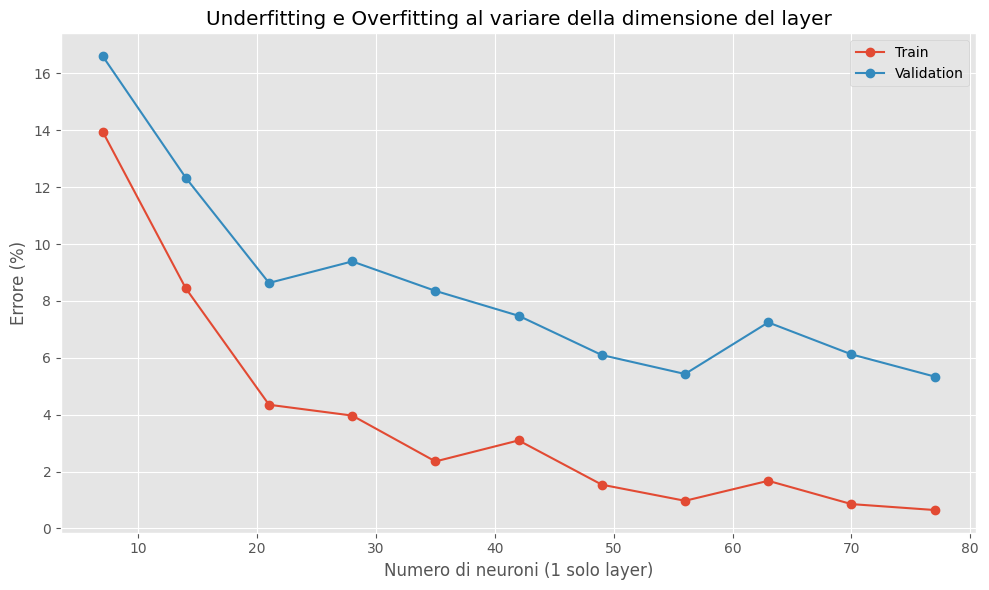

In [55]:

hidden_layer_sizes = [(n,) for n in 7 * np.arange(1, 12)]

model_MLP_neurons = MLPClassifier(
    #learning_rate=best_params_MLP['learning_rate'],
    activation=best_params_MLP['activation'],
    max_iter=best_params_MLP['max_iter'],
    #solver=best_params_MLP['solver'],
    #alpha=best_params_MLP['alpha'],
    random_state=31415
)

# GridSearch solo sulla dimensione del layer
grid_search_neurons = GridSearchCV(
    estimator=model_MLP_neurons,
    param_grid={'hidden_layer_sizes': hidden_layer_sizes},
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
)

# Fit del modello
grid_search_neurons.fit(x_train_final, y_train)
results_neurons = pd.DataFrame(grid_search_neurons.cv_results_)

# Calcolo errori
train_error = (1 - results_neurons['mean_train_score']) * 100
val_error = (1 - results_neurons['mean_test_score']) * 100

# Estrai numero di neuroni dall'etichetta param
neurons_list = [size[0] for size in results_neurons['param_hidden_layer_sizes']]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(neurons_list, train_error, label='Train', marker='o')
plt.plot(neurons_list, val_error, label='Validation', marker='o')

# Linea verticale per la dimensione ottimale trovata dal modello migliore
if np.shape(best_params_MLP['hidden_layer_sizes']) == (1,):
    best_neurons = best_params_MLP['hidden_layer_sizes'][0]  
    plt.axvline(best_neurons, color='red', linestyle='--', label=f"Best neurons = {best_neurons}")

plt.xlabel("Numero di neuroni (1 solo layer)")
plt.ylabel("Errore (%)")
plt.title("Underfitting e Overfitting al variare della dimensione del layer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ROC

In [56]:
#dati NON preprocessati
K_FOLD=5


#DECISION TREE

model_DT_NP = DecisionTreeClassifier(random_state=31415)

# Initializing a GridSearchCV object
grid_search_DT_NP = GridSearchCV(
    estimator = model_DT_NP,
    param_grid={
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 30, 40],
        'min_samples_split': [3, 6, 10],
        'min_impurity_decrease': [0.5, 0.05, 0.005],
    },
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1,
    return_train_score=True #serve per vedere in seguito Underfitting e Overfitting
)

model_DT_NP = grid_search_DT_NP.fit(x_train, y_train)

'''NB
Attualmente, model_DT contiene l'oggetto GridSearchCV già addestrato (dopo .fit(...)). All'interno di questo oggetto sono salvati:
-Il modello migliore trovato (best_estimator_)
-La combinazione di iperparametri corrispondente (best_params_)
-Lo score associato al modello migliore (best_score_)
'''
best_estimator_DT_NP=model_DT_NP.best_estimator_





#KNN


model_KNN_NP=KNeighborsClassifier()
n_neighbors=np.arange(2,20)
weights=['uniform', 'distance']
metric=['euclidean', 'manhattan']
algorithm=['auto', 'ball_tree']


grid_search_KNN_NP = GridSearchCV(
    estimator = model_KNN_NP,
    param_grid={
        'n_neighbors': n_neighbors,
        'weights': weights,
        'metric': metric,
        'algorithm': algorithm
    },
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1,
)

model_KNN_NP = grid_search_KNN_NP.fit(scaler.inverse_transform(X_train),y_train)

best_estimator_KNN_NP=model_KNN_NP.best_estimator_




#SVM


model_SVM_NP = SVC(random_state=31415,probability=True)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

grid_search_SVM_NP = GridSearchCV(
    estimator=model_SVM_NP,
    param_grid=param_grid,
    scoring='f1_macro',
      cv=K_FOLD,
    verbose=1,
    n_jobs=-1
)



model_SVM_NP = grid_search_SVM_NP.fit(scaler.inverse_transform(X_train),y_train)

best_estimator_SVM_NP=model_SVM_NP.best_estimator_





#MLP


model_MLP_NP = MLPClassifier()


hidden_layer_sizes=[(20,), (30,30), (10, 10, 10), (50,)]

grid_search_MLP_NP = GridSearchCV(
    estimator = model_MLP_NP,
    param_grid={
        'hidden_layer_sizes': hidden_layer_sizes ,
        'activation': ['relu'],#, 'tanh','logistic'],
        'max_iter': [3000],
        #'solver': ['adam', 'sgd'],
        #'alpha' : [1e-4, 1e-1],
        }  ,   
    scoring='f1_macro',
    cv=K_FOLD,
    verbose=2,  
    n_jobs=1,
)

model_MLP_NP = grid_search_MLP_NP.fit(scaler.inverse_transform(X_train), y_train)

best_estimator_MLP_NP=model_MLP_NP.best_estimator_




Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(20,), max_iter=3000; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=3000; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), m

c:\Users\ANDY\OneDrive\Desktop\POLI\Analisi_tempo_frequenza\ambiente_virtuale\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


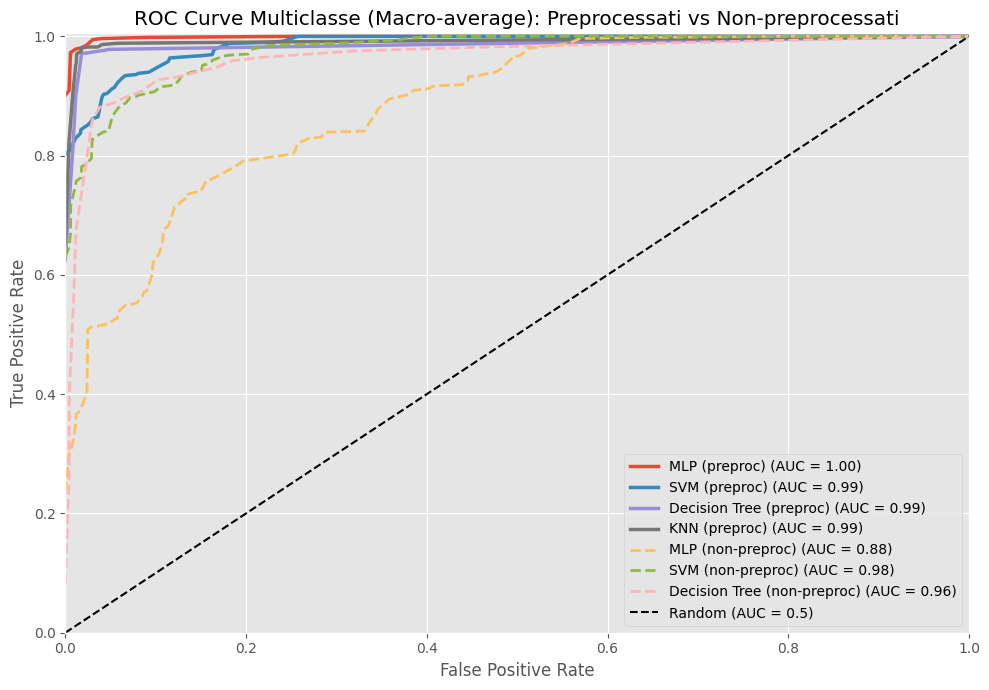

In [57]:
# Binarizzazione etichette
classi = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classi)
n_classi = y_test_bin.shape[1]

# Probabilità dai modelli preprocessati
y_score_mlp = best_estimator_MLP.predict_proba(x_test_final)
y_score_svm = best_estimator_SVM.predict_proba(x_test_final)
y_score_dt = best_estimator_DT.predict_proba(x_test_final)
y_score_knn = best_estimator_KNN.predict_proba(x_test_final)

# Probabilità dai modelli NON preprocessati
y_score_mlp_NP = best_estimator_MLP_NP.predict_proba(scaler.inverse_transform(X_test))
y_score_svm_NP = best_estimator_SVM_NP.predict_proba(scaler.inverse_transform(X_test))
y_score_dt_NP = best_estimator_DT_NP.predict_proba(scaler.inverse_transform(X_test))
y_score_knn_NP = best_estimator_KNN_NP.predict_proba(scaler.inverse_transform(X_test))

# Funzione macro-average ROC
def compute_macro_roc_auc(y_true_bin, y_score, label):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classi):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classi)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classi):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classi
    roc_auc_macro = auc(all_fpr, mean_tpr)
    return all_fpr, mean_tpr, roc_auc_macro, label

# Plot
plt.figure(figsize=(10, 7))

# Modelli preprocessati
for y_score, model_name in zip(
    [y_score_mlp, y_score_svm, y_score_dt, y_score_knn],
    ["MLP", "SVM", "Decision Tree", "KNN"]
):
    fpr_macro, tpr_macro, auc_macro, label = compute_macro_roc_auc(y_test_bin, y_score, model_name + " (preproc)")
    plt.plot(fpr_macro, tpr_macro, label=f"{label} (AUC = {auc_macro:.2f})", linewidth=2.5)

# Modelli non preprocessati
for y_score, model_name in zip(
    [y_score_mlp_NP, y_score_svm_NP, y_score_dt_NP],
    ["MLP", "SVM", "Decision Tree"]
):
    fpr_macro, tpr_macro, auc_macro, label = compute_macro_roc_auc(y_test_bin, y_score, model_name + " (non-preproc)")
    plt.plot(fpr_macro, tpr_macro, linestyle='--', label=f"{label} (AUC = {auc_macro:.2f})", linewidth=2)

# Diagonale "random"
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)", linewidth=1.5)

# Zoom + stile
plt.xlim(0, 1)
plt.ylim(0, 1.005)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multiclasse (Macro-average): Preprocessati vs Non-preprocessati")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


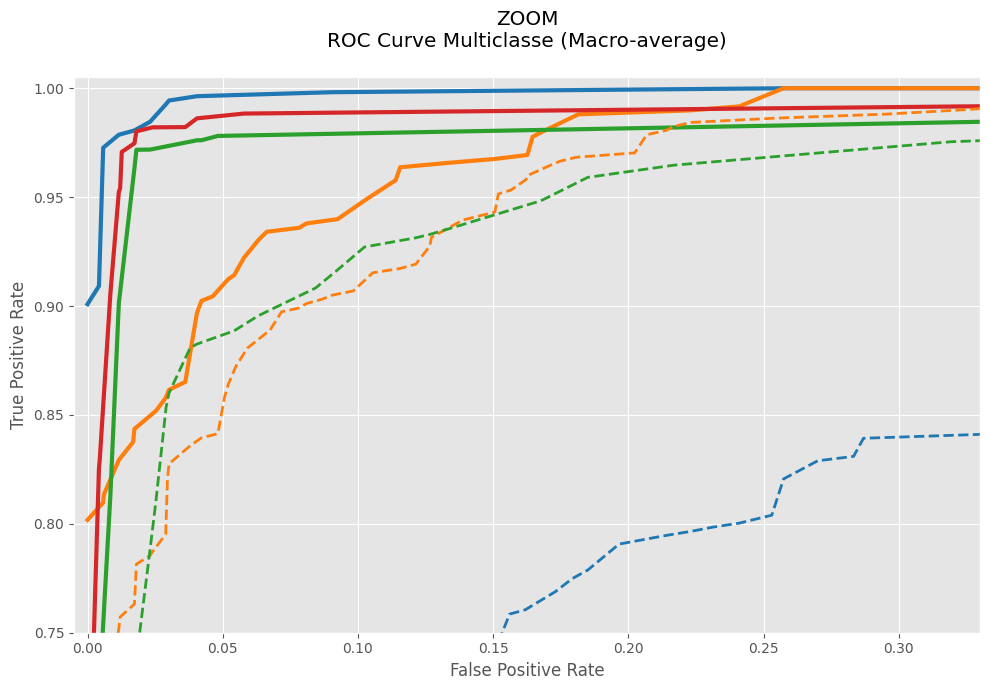

In [58]:
# colori espliciti
colors = {
    "MLP": "tab:blue",
    "SVM": "tab:orange",
    "Decision Tree": "tab:green",
    "KNN": "tab:red"
}

plt.figure(figsize=(10, 7))

# Modelli preprocessati (linea piena)
for y_score, model_name in zip(
    [y_score_mlp, y_score_svm, y_score_dt, y_score_knn],
    ["MLP", "SVM", "Decision Tree", "KNN"]
):
    fpr_macro, tpr_macro, auc_macro, label = compute_macro_roc_auc(y_test_bin, y_score, model_name)
    plt.plot(
        fpr_macro, tpr_macro,
        label=f"{label} ",
        linewidth=3,
        color=colors[model_name],
        linestyle='-'
    )

# Modelli non preprocessati (linea tratteggiata, stesso colore)
for y_score, model_name in zip(
    [y_score_mlp_NP, y_score_svm_NP, y_score_dt_NP],
    ["MLP", "SVM", "Decision Tree"]
):
    fpr_macro, tpr_macro, auc_macro, label = compute_macro_roc_auc(
        y_test_bin, y_score, model_name + " (non-preproc)"
    )
    plt.plot(
        fpr_macro, tpr_macro,
        label=f"{label} ",
        linewidth=2,
        color=colors[model_name],  # usa lo stesso colore del preprocessato
        linestyle='--'
    )

# Etichette e zoom
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ZOOM\nROC Curve Multiclasse (Macro-average)\n")
plt.xlim(-0.005, 0.33)
plt.ylim(0.75, 1.005)
plt.grid(True)
#plt.legend(loc="lower right")
plt.tight_layout()
plt.show()